EE 559 Project


Naman Rajendra Joshi


Sanskar Tewatia

In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from collections import Counter
import random
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
import pickle
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA


In [123]:
train_data = pd.read_csv("credit_card_dataset_train.csv")
test_data = pd.read_csv("credit_card_dataset_test.csv")

In [3]:
train_data

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0         170000    2          2         1   52      0      0      0      0   
1         150000    2          2         1   39      1     -2     -2     -2   
2         120000    1          2         1   40      0      0      0      0   
3         270000    2          1         2   28     -1     -1     -1     -1   
4          50000    2          2         1   31      0      0      0      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
26995      10000    2          2         2   27      2      0      0      0   
26996     240000    1          2         1   45      0      0      0      0   
26997     160000    1          1         1   41     -1     -1     -1     -1   
26998     210000    1          1         2   38      2      0      0      0   
26999     150000    1          1         2   35     -1     -1     -1     -1   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0          0  ...     163652     131396     130402      7620      6200   
1         -2  ...          0          0          0         0         0   
2          0  ...      39510      40873      42082      2000      2000   
3          0  ...       7931       3412       1035       845      9896   
4          0  ...      30929      30078      29170      1974      4406   
...      ...  ...        ...        ...        ...       ...       ...   
26995      0  ...       8688       8865       9046      1124      1207   
26996      0  ...     225623     221130     225446     10000      9000   
26997     -1  ...       1310       2374       1444       230      1500   
26998      0  ...      62683      63663      46549      3276      2026   
26999     -1  ...        780          0          0      9054         0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         10000      5100      5500      5000                           1  
1             0         0         0         0                           1  
2          2000      2000      2000      3000                           0  
3          7977        17      1040      1848                           0  
4          1061      1073      1046      1047                           1  
...         ...       ...       ...       ...                         ...  
26995      1000       177       181         0                           0  
26996     10000      8301      9000     13000                           0  
26997      1310      1444         0      1000                           1  
26998      2000      2000      2000      2502                           0  
26999       783         0         0         0                           0  

[27000 rows x 24 columns]

In [327]:
test_data

LIMIT_BAL  SEX  EDUCATION  MARRIAGE       AGE  PAY_0  PAY_2  PAY_3  \
0     -1.222222    1          2         1 -1.500000     -1     -1     -2   
1     -1.000000    2          3         1  2.833333     -1     -1     -1   
2      2.111111    1          1         2  1.666667      0      0      0   
3      3.555556    2          3         1  1.333333      0      0      0   
4      2.000000    1          2         2 -0.833333      0      0      0   
...         ...  ...        ...       ...       ...    ...    ...    ...   
2995   1.888889    2          2         2 -0.500000      0      0      0   
2996  -0.888889    1          2         2 -1.333333      0      0      0   
2997   1.777778    2          1         1 -0.666667      0      0      0   
2998  -1.333333    2          2         1  1.333333      0      0      0   
2999   0.666667    2          1         2 -0.833333     -2     -2     -2   

      PAY_4  PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0        -1      2  ...   0.364093   0.466275   0.508741 -0.369938 -1.009041   
1        -1     -2  ...  -1.021653  -1.023490  -1.018849 -0.935358  1.944249   
2         0      0  ...   6.095314   5.930638   6.201154  4.626687  4.639377   
3        -2     -1  ...  -1.021653  -0.932070  -0.793198 -0.260384 -0.506781   
4         0      0  ...   6.095314   5.930638   6.201154  4.626687  4.639377   
...     ...    ...  ...        ...        ...        ...       ...       ...   
2995      0      0  ...  -0.227438  -0.308507  -0.446367 -0.052700 -0.356102   
2996      0      0  ...   1.958244   0.498744   0.696397  0.093718  0.158212   
2997      0      0  ...   3.054694   2.801971   3.166488  0.466511  1.502260   
2998      3      2  ...  -0.197231  -0.236963  -0.346533 -0.455607  0.599699   
2999     -2     -2  ...  -1.032239  -1.056693  -0.977762 -0.888629 -0.912607   

      PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0     4.994230 -0.333333 -1.000000  5.543917                           0  
1    -1.005006 -1.000000 -1.000000 -1.000000                           1  
2     4.994230  5.389000  3.666667  3.666667                           0  
3    -1.005006  0.079333  1.530000 -0.364000                           0  
4     4.994230  5.389000  5.452333  5.543917                           0  
...        ...       ...       ...       ...                         ...  
2995 -0.192436 -0.333333  0.333333  0.333333                           0  
2996  0.134594  0.333333  1.000000 -0.253333                           1  
2997  0.385428  0.666667  1.333333  5.543917                           1  
2998 -1.005006 -0.333333 -1.000000  0.333333                           0  
2999 -0.927141 -1.000000  0.151333 -0.808667                           0  

[3000 rows x 24 columns]

Exploratory Data Analysis

Objectives

1) To understand the dataset 
2) To understand which variables are useful for classification 
3) To draw different types of plots to understand the dataset.

In [4]:
print(train_data.isnull().sum())  # To check if there are any null values

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


There are no null values

In [6]:
print(train_data.shape)  #shape

(27000, 24)


In [7]:
print(train_data.columns)  #columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


In [8]:
train_data['default payment next month'].value_counts()

0    21028
1     5972
Name: default payment next month, dtype: int64

Observations

We can clearly see that the dataset is clearly imbalanced with class 0(people not defaulting) is the majority class

In [7]:
train_data[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'default payment next month']]

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  default payment next month
0         170000    2          2         1   52                           1
1         150000    2          2         1   39                           1
2         120000    1          2         1   40                           0
3         270000    2          1         2   28                           0
4          50000    2          2         1   31                           1
...          ...  ...        ...       ...  ...                         ...
26995      10000    2          2         2   27                           0
26996     240000    1          2         1   45                           0
26997     160000    1          1         1   41                           1
26998     210000    1          1         2   38                           0
26999     150000    1          1         2   35                           0

[27000 rows x 6 columns]

In [9]:
import warnings    # to ignore the warning messages
warnings.filterwarnings('ignore')

We are ploting a pair plot so as to see any relation between variables

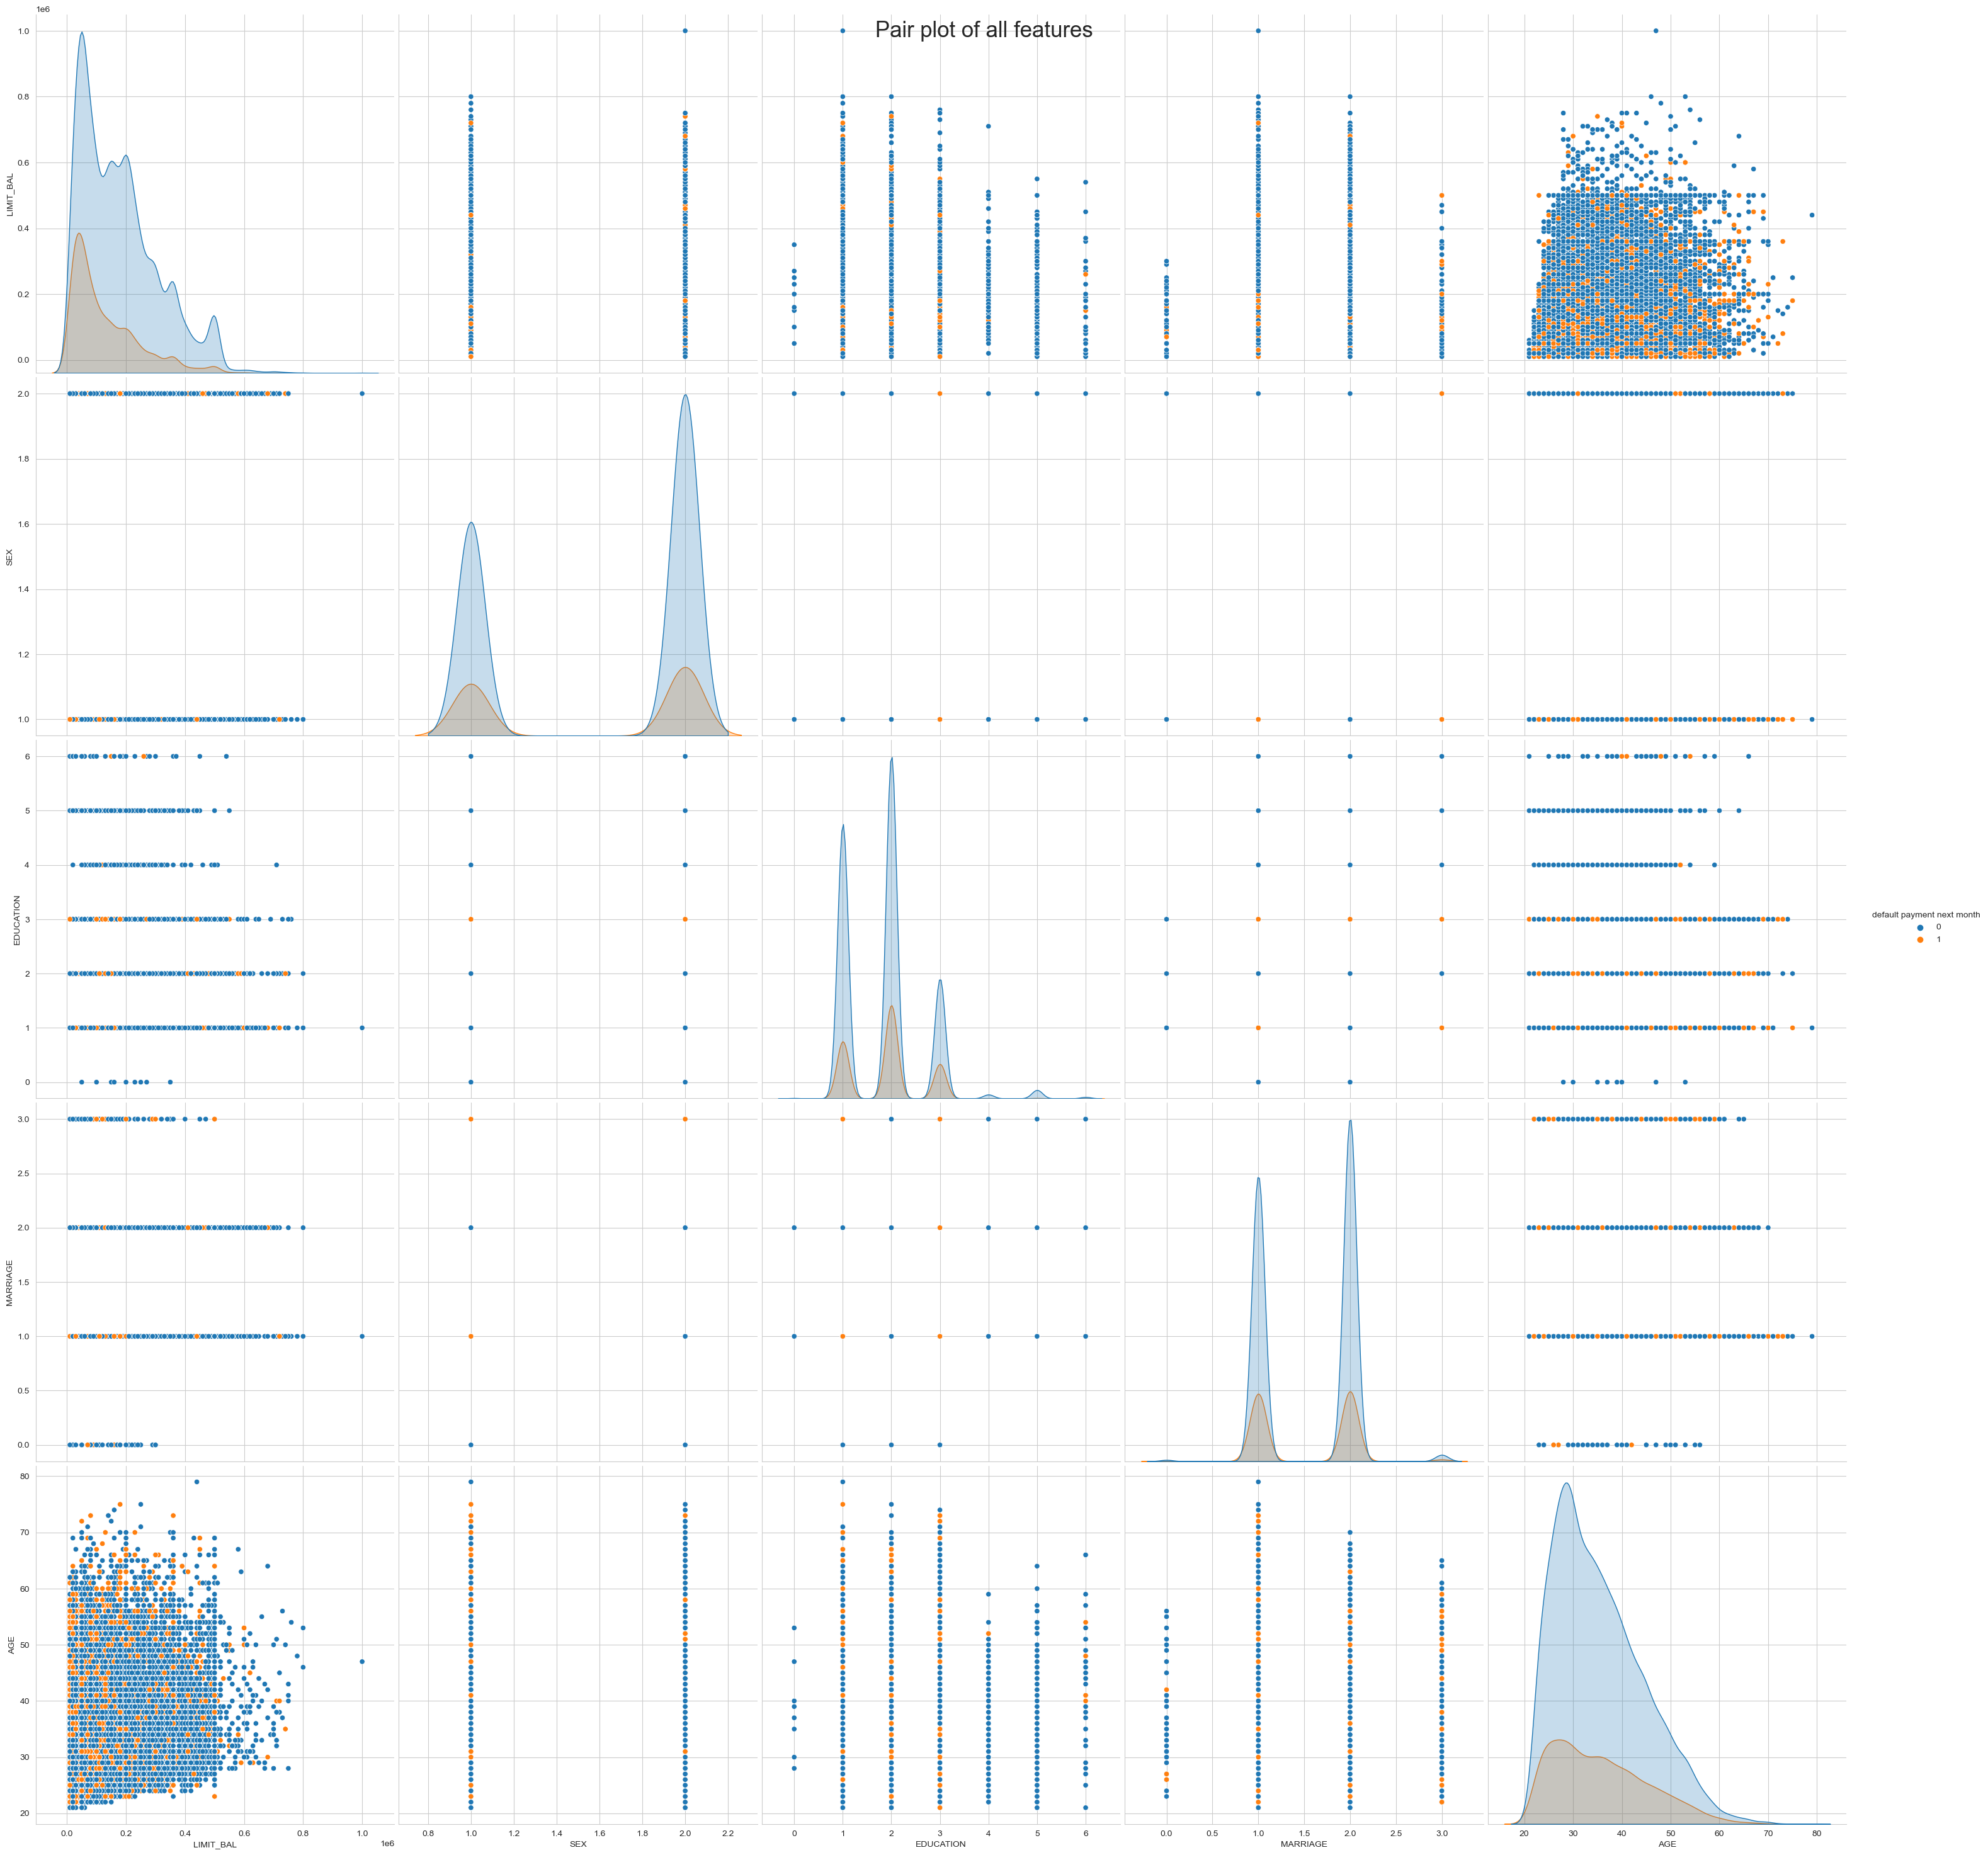

In [9]:
plt.close()
sns.set_style('whitegrid')
z = sns.pairplot(train_data[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
                             'default payment next month']], hue='default payment next month', height=6)
z.fig.suptitle('Pair plot of all features', fontsize=25)
plt.show()

Lets check out more important plots from the above pair plots

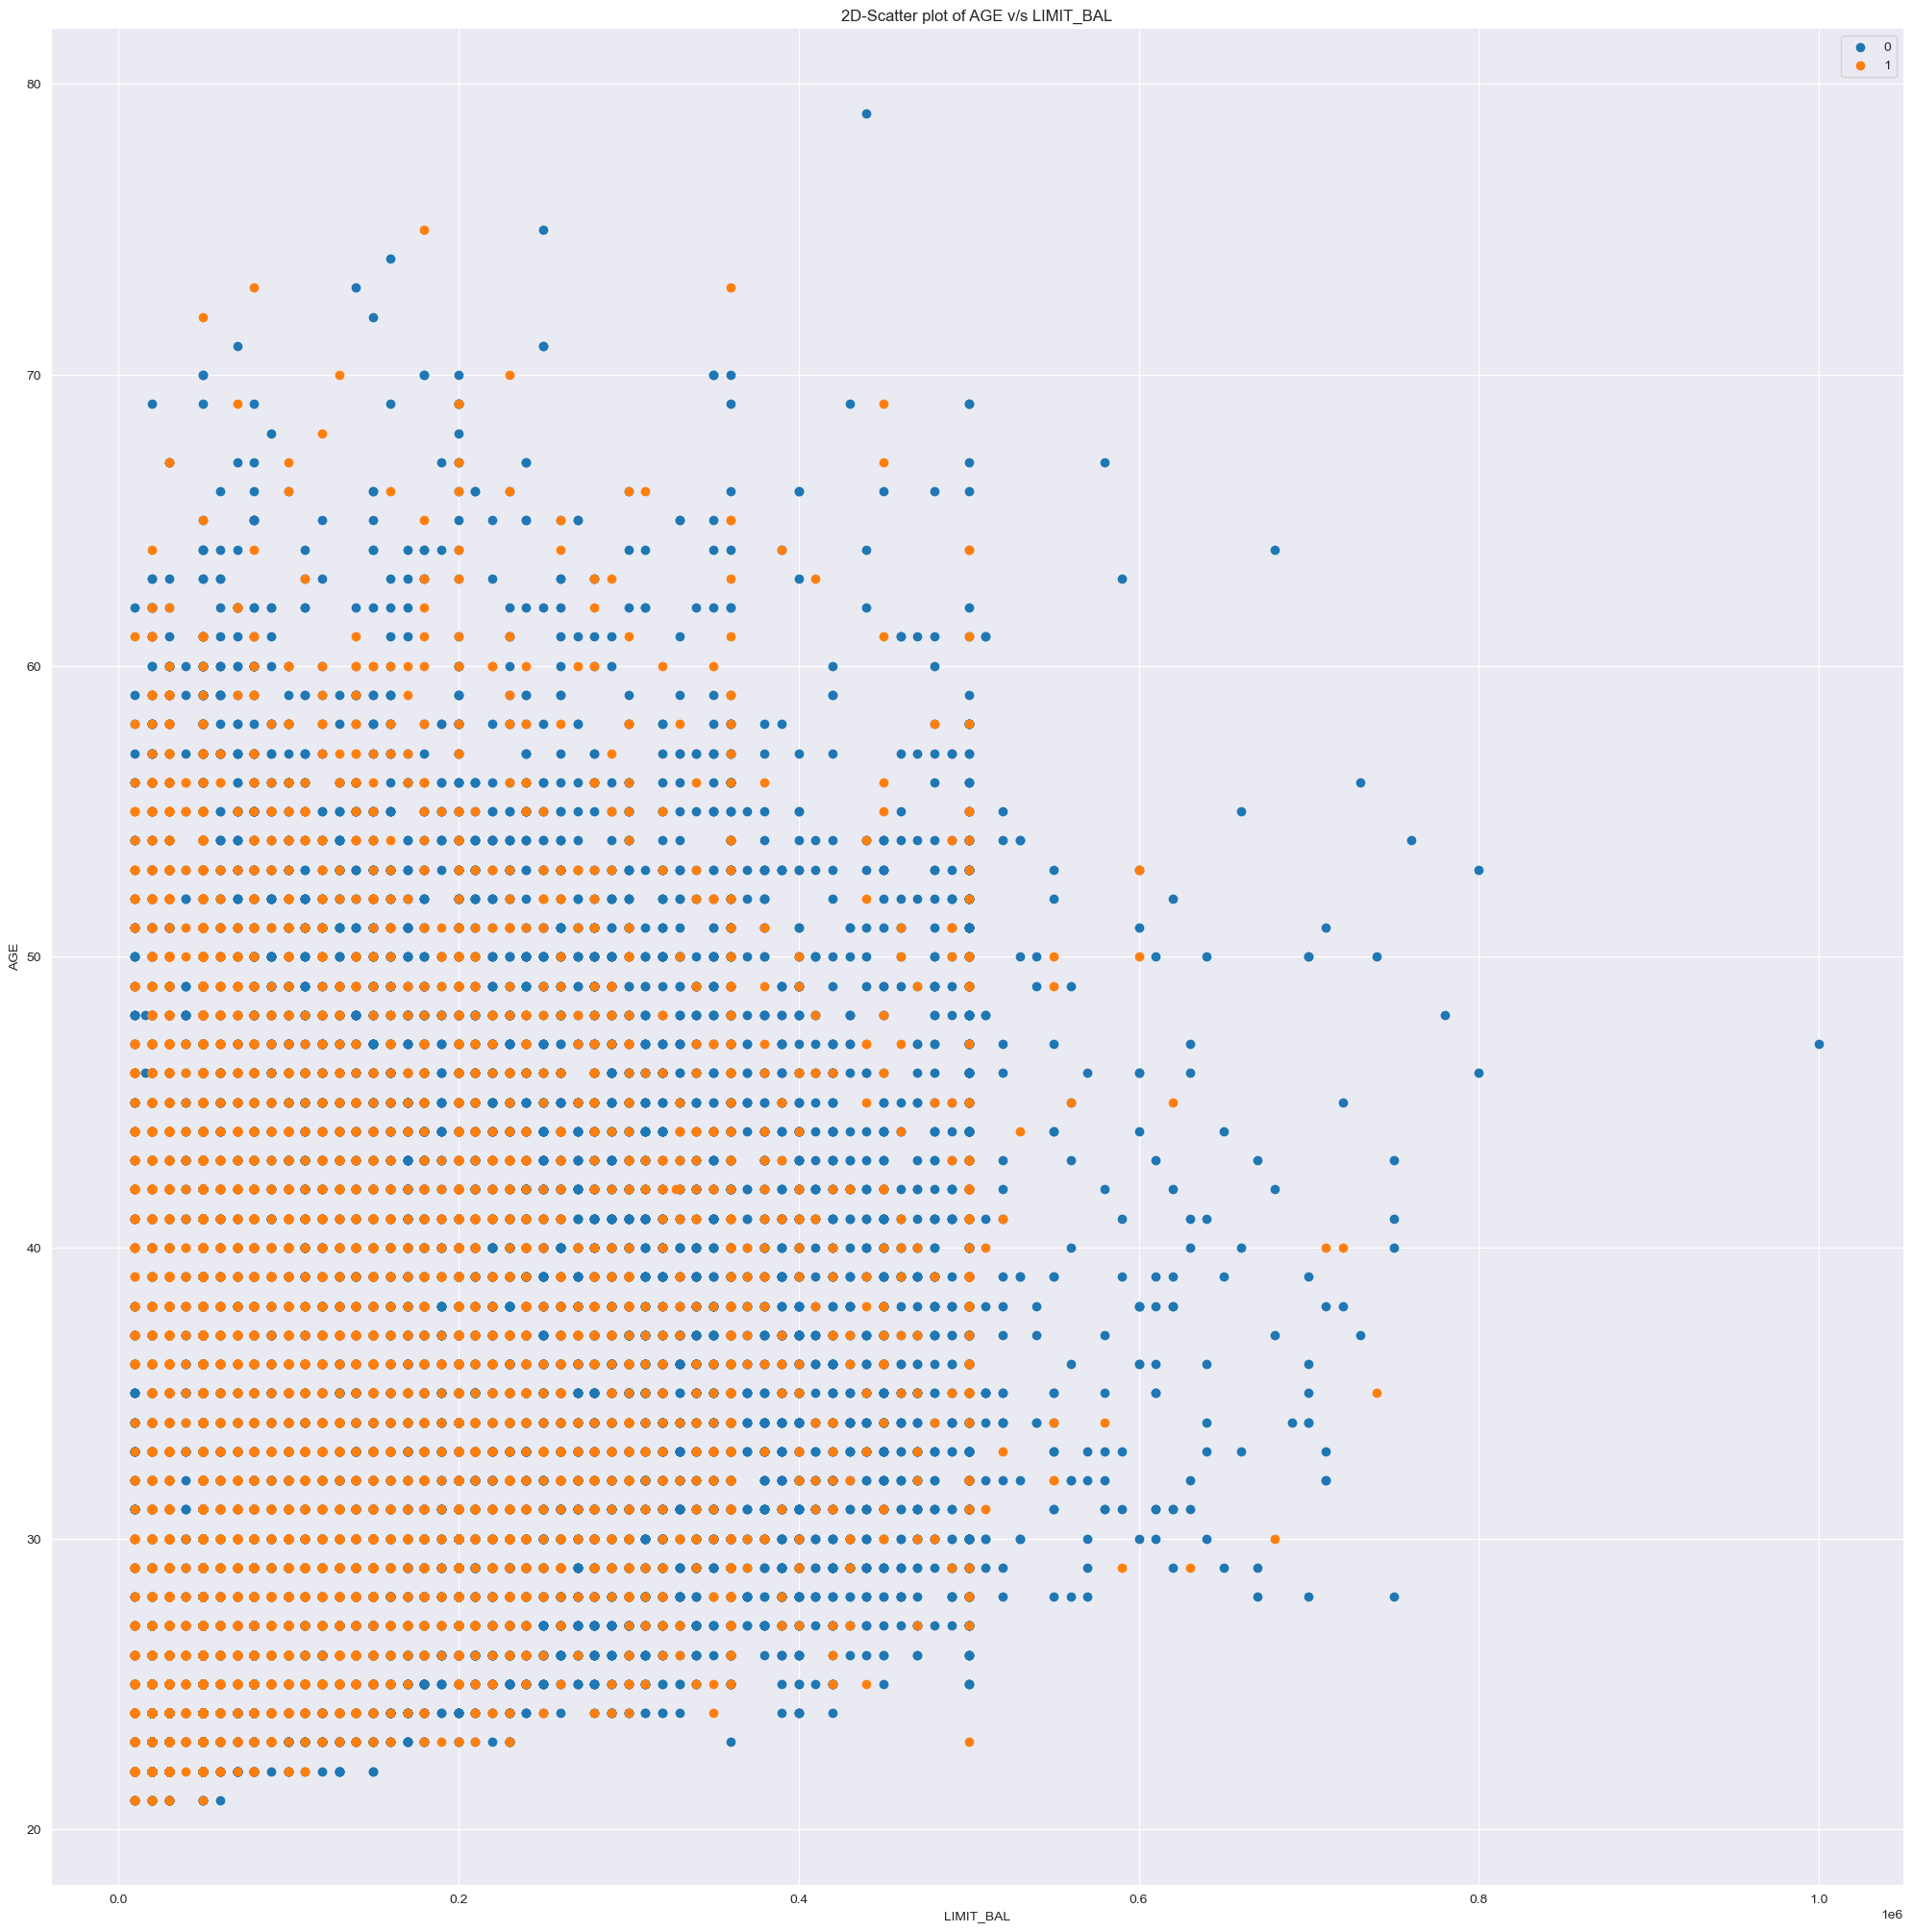

In [24]:
sns.set_style('darkgrid')
sns.FacetGrid(train_data, hue='default payment next month', height=20, aspect = 1) \
    .map(plt.scatter,'LIMIT_BAL','AGE')

plt.ylabel('AGE')
plt.xlabel('LIMIT_BAL')
plt.legend()
plt.title('2D-Scatter plot of AGE v/s LIMIT_BAL')
plt.show()

Observation

From the above plot we can see that people having higher amount of credit are defaulting less.

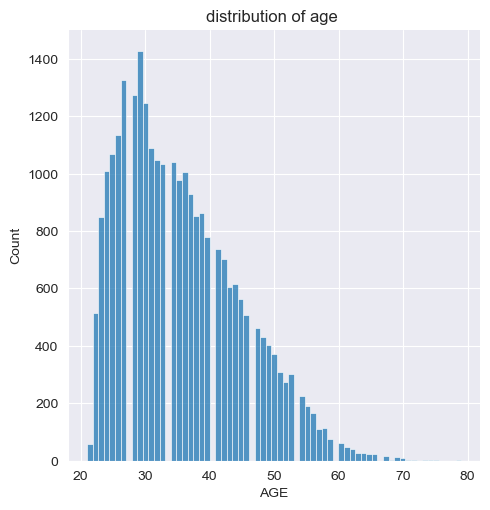

In [31]:
sns.displot(train_data['AGE'])
plt.title('distribution of age ')
plt.show()


We can see that most people are in late 20's and 30's

In [15]:
# get the number of target values where col1 has the value 'A'
num_targets = train_data.loc[train_data['SEX'] == 1, 'default payment next month'].value_counts()
num_targets


0    8097
1    2571
Name: default payment next month, dtype: int64

Ratio of 1/0 = 2571/8097 = 0.3175

In [16]:
# get the number of target values where col1 has the value 'A'
num_targets = train_data.loc[train_data['SEX'] == 2, 'default payment next month'].value_counts()
num_targets


0    12931
1     3401
Name: default payment next month, dtype: int64

Ratio of 1/0 = 3401/12931 = 0.263

Observations

1) Firstly we can see that for the feature Education, the values (0,5 and 6) have not much relation with 1,2 and 3. Hence we need to convert these values others category(values).

2) Then we can see from the ratios that females have a less percentage of defaults as compared to males

Replacing 0 of marriage with 3(others)

In [124]:
train_data['MARRIAGE']=train_data['MARRIAGE'].replace({0:3})
test_data['MARRIAGE']=test_data['MARRIAGE'].replace({0:3})

In [27]:
train_data['MARRIAGE'].value_counts()

2    14340
1    12328
3      332
Name: MARRIAGE, dtype: int64

In [125]:
train_data['EDUCATION']=train_data['EDUCATION'].replace({0:4,5:4,6:4})
test_data['EDUCATION']=test_data['EDUCATION'].replace({0:4,5:4,6:4})

OUTLIERS REMOVAL IN NUMERICAL DATA

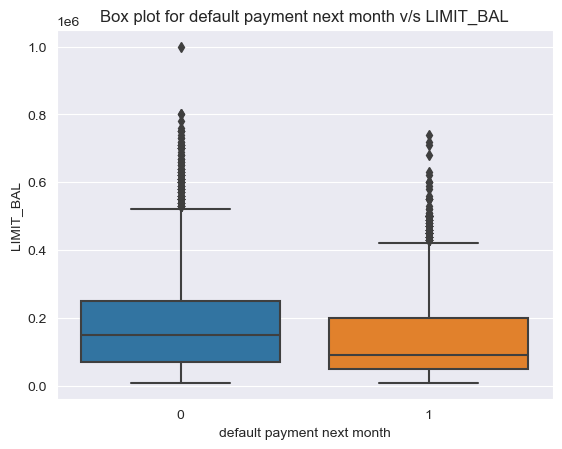

In [57]:
sns.boxplot(x='default payment next month', y='LIMIT_BAL', data=train_data)
plt.ylabel('LIMIT_BAL')
plt.xlabel('default payment next month')
plt.title("Box plot for default payment next month v/s LIMIT_BAL")
plt.show()


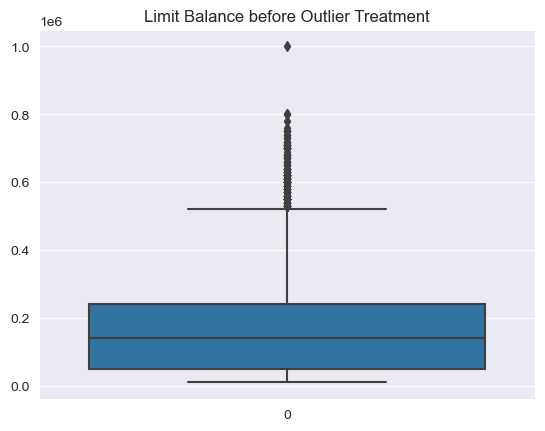

In [59]:
sns.boxplot(train_data['LIMIT_BAL'])
plt.title('Limit Balance before Outlier Treatment')
plt.show()


In [126]:
def cap_outliers(df, column,test_data):

    q1, q3 = np.percentile(train_data[column], [25, 75])
    iqr = q3 - q1
    lower = (q1 - (1.5*iqr))
    upper = (q3 + (1.5*iqr))
    print("lower bound",lower)
    print("upper bound",upper)
    # Cap the outliers
    df[column] = np.where(df[column] < lower, lower, df[column])
    df[column] = np.where(df[column] > upper, upper, df[column])
    test_data[column] = np.where(test_data[column] < lower, lower, test_data[column])
    test_data[column] = np.where(test_data[column] > upper, upper, test_data[column])


    return df,test_data

In [127]:
train_data,test_data=cap_outliers(train_data,'LIMIT_BAL',test_data)

lower bound -235000.0
upper bound 525000.0


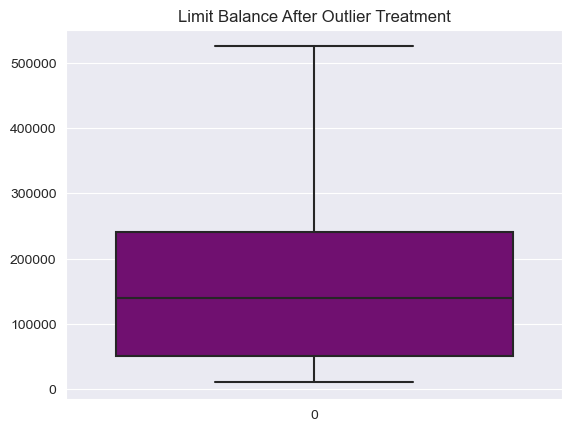

In [245]:
sns.boxplot(train_data['LIMIT_BAL'],color = 'purple')
plt.title('Limit Balance After Outlier Treatment')
plt.show()


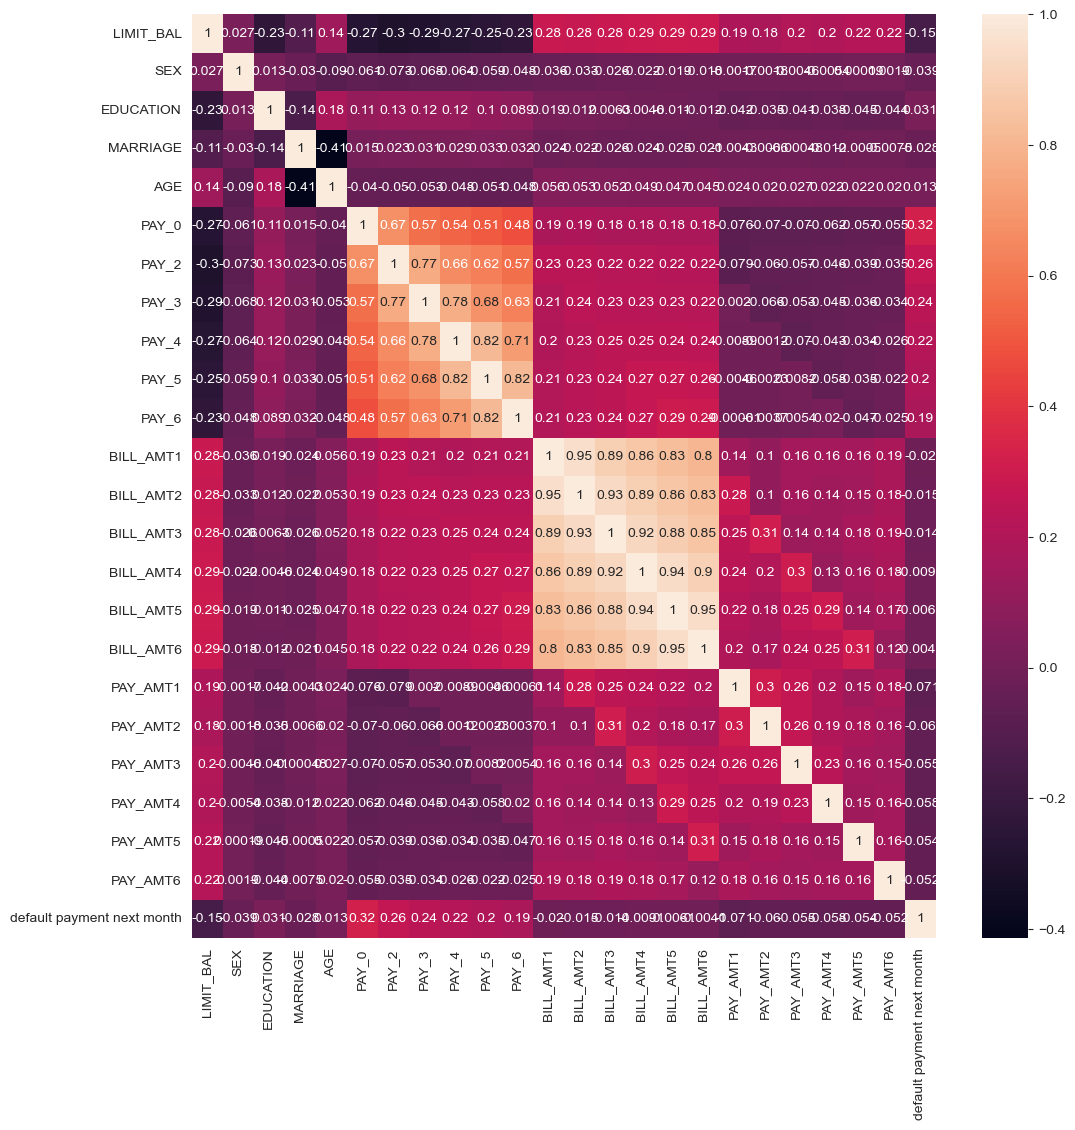

In [78]:
corr_matrix = train_data.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True)
plt.show()


From the above correlation matrix, we can clearly see that PAY_0 to PAY_6, the repayment status of months which are nearby have much higher correlation than others, similarly for amount of bill statement.

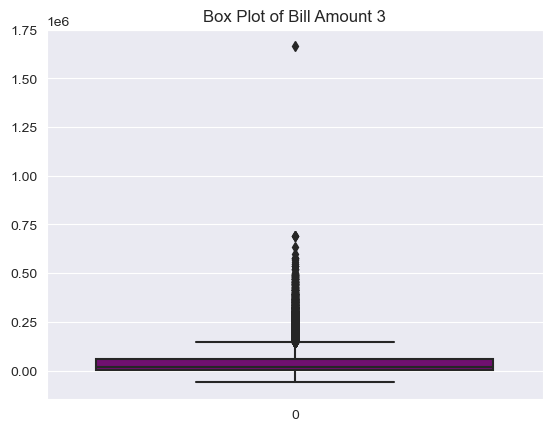

In [246]:
sns.boxplot(train_data['BILL_AMT3'], color='purple')
plt.title('Box Plot of Bill Amount 3')
plt.show()


We can see outliers here. Lets cap the outliers

In [128]:
for i in range(1,7):
    feature='BILL_AMT'+str(i)
    print(feature)
    train_data,test_data=cap_outliers(train_data,feature,test_data)

BILL_AMT1
lower bound -92467.25
upper bound 163660.75
BILL_AMT2
lower bound -88778.875
upper bound 155924.125
BILL_AMT3
lower bound -83821.375
upper bound 146895.625
BILL_AMT4
lower bound -76108.25
upper bound 133115.75
BILL_AMT5
lower bound -71034.875
upper bound 123154.125
BILL_AMT6
lower bound -70838.0
upper bound 121426.0


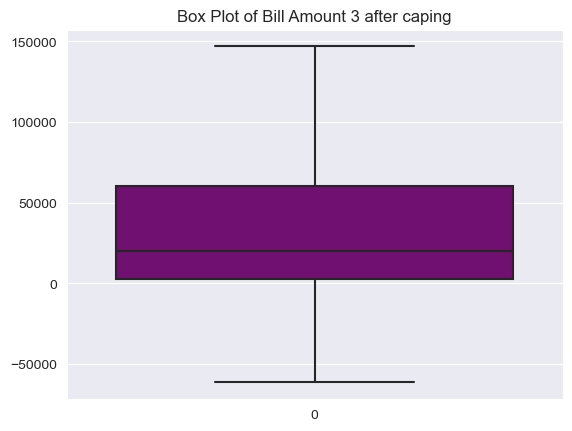

In [248]:
sns.boxplot(train_data['BILL_AMT3'], color='purple')
plt.title('Box Plot of Bill Amount 3 after caping')
plt.show()


Similarly

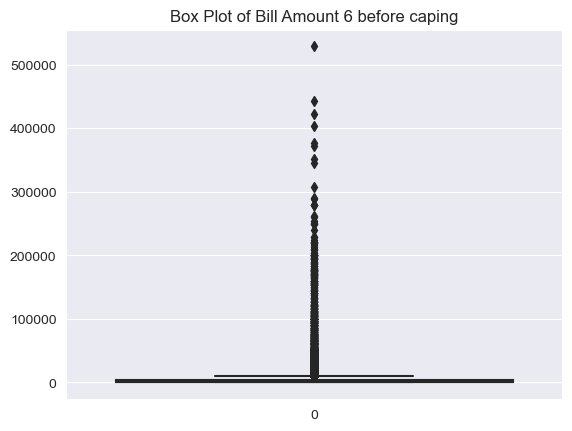

In [249]:
sns.boxplot(train_data['PAY_AMT6'], color='purple')
plt.title('Box Plot of Bill Amount 6 before caping')
plt.show()


In [129]:
for i in range(1,7):
    feature='PAY_AMT'+str(i)
    print(feature)
    train_data,test_data=cap_outliers(train_data,feature,test_data)

PAY_AMT1
lower bound -5007.5
upper bound 11012.5
PAY_AMT2
lower bound -5410.0
upper bound 11246.0
PAY_AMT3
lower bound -5838.375
upper bound 10786.625
PAY_AMT4
lower bound -5284.5
upper bound 9583.5
PAY_AMT5
lower bound -5381.5
upper bound 9678.5
PAY_AMT6
lower bound -5693.125
upper bound 9815.875


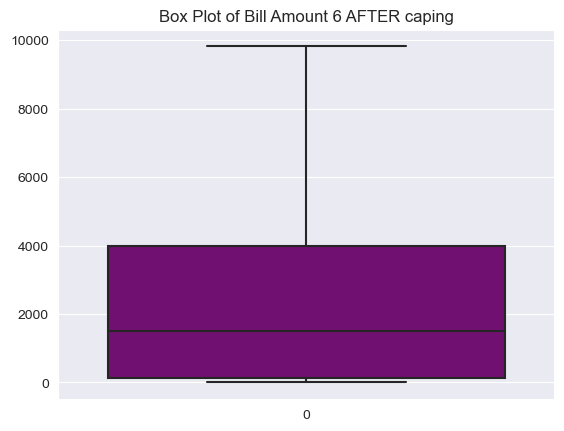

In [252]:
sns.boxplot(train_data['PAY_AMT6'], color='purple')
plt.title('Box Plot of Bill Amount 6 AFTER caping')
plt.show()


Feature Standardization

[[<AxesSubplot: title={'center': 'LIMIT_BAL'}>
  <AxesSubplot: title={'center': 'SEX'}>
  <AxesSubplot: title={'center': 'EDUCATION'}>
  <AxesSubplot: title={'center': 'MARRIAGE'}>
  <AxesSubplot: title={'center': 'AGE'}>]
 [<AxesSubplot: title={'center': 'PAY_0'}>
  <AxesSubplot: title={'center': 'PAY_2'}>
  <AxesSubplot: title={'center': 'PAY_3'}>
  <AxesSubplot: title={'center': 'PAY_4'}>
  <AxesSubplot: title={'center': 'PAY_5'}>]
 [<AxesSubplot: title={'center': 'PAY_6'}>
  <AxesSubplot: title={'center': 'BILL_AMT1'}>
  <AxesSubplot: title={'center': 'BILL_AMT2'}>
  <AxesSubplot: title={'center': 'BILL_AMT3'}>
  <AxesSubplot: title={'center': 'BILL_AMT4'}>]
 [<AxesSubplot: title={'center': 'BILL_AMT5'}>
  <AxesSubplot: title={'center': 'BILL_AMT6'}>
  <AxesSubplot: title={'center': 'PAY_AMT1'}>
  <AxesSubplot: title={'center': 'PAY_AMT2'}>
  <AxesSubplot: title={'center': 'PAY_AMT3'}>]
 [<AxesSubplot: title={'center': 'PAY_AMT4'}>
  <AxesSubplot: title={'center': 'PAY_AMT5'}>
  <A

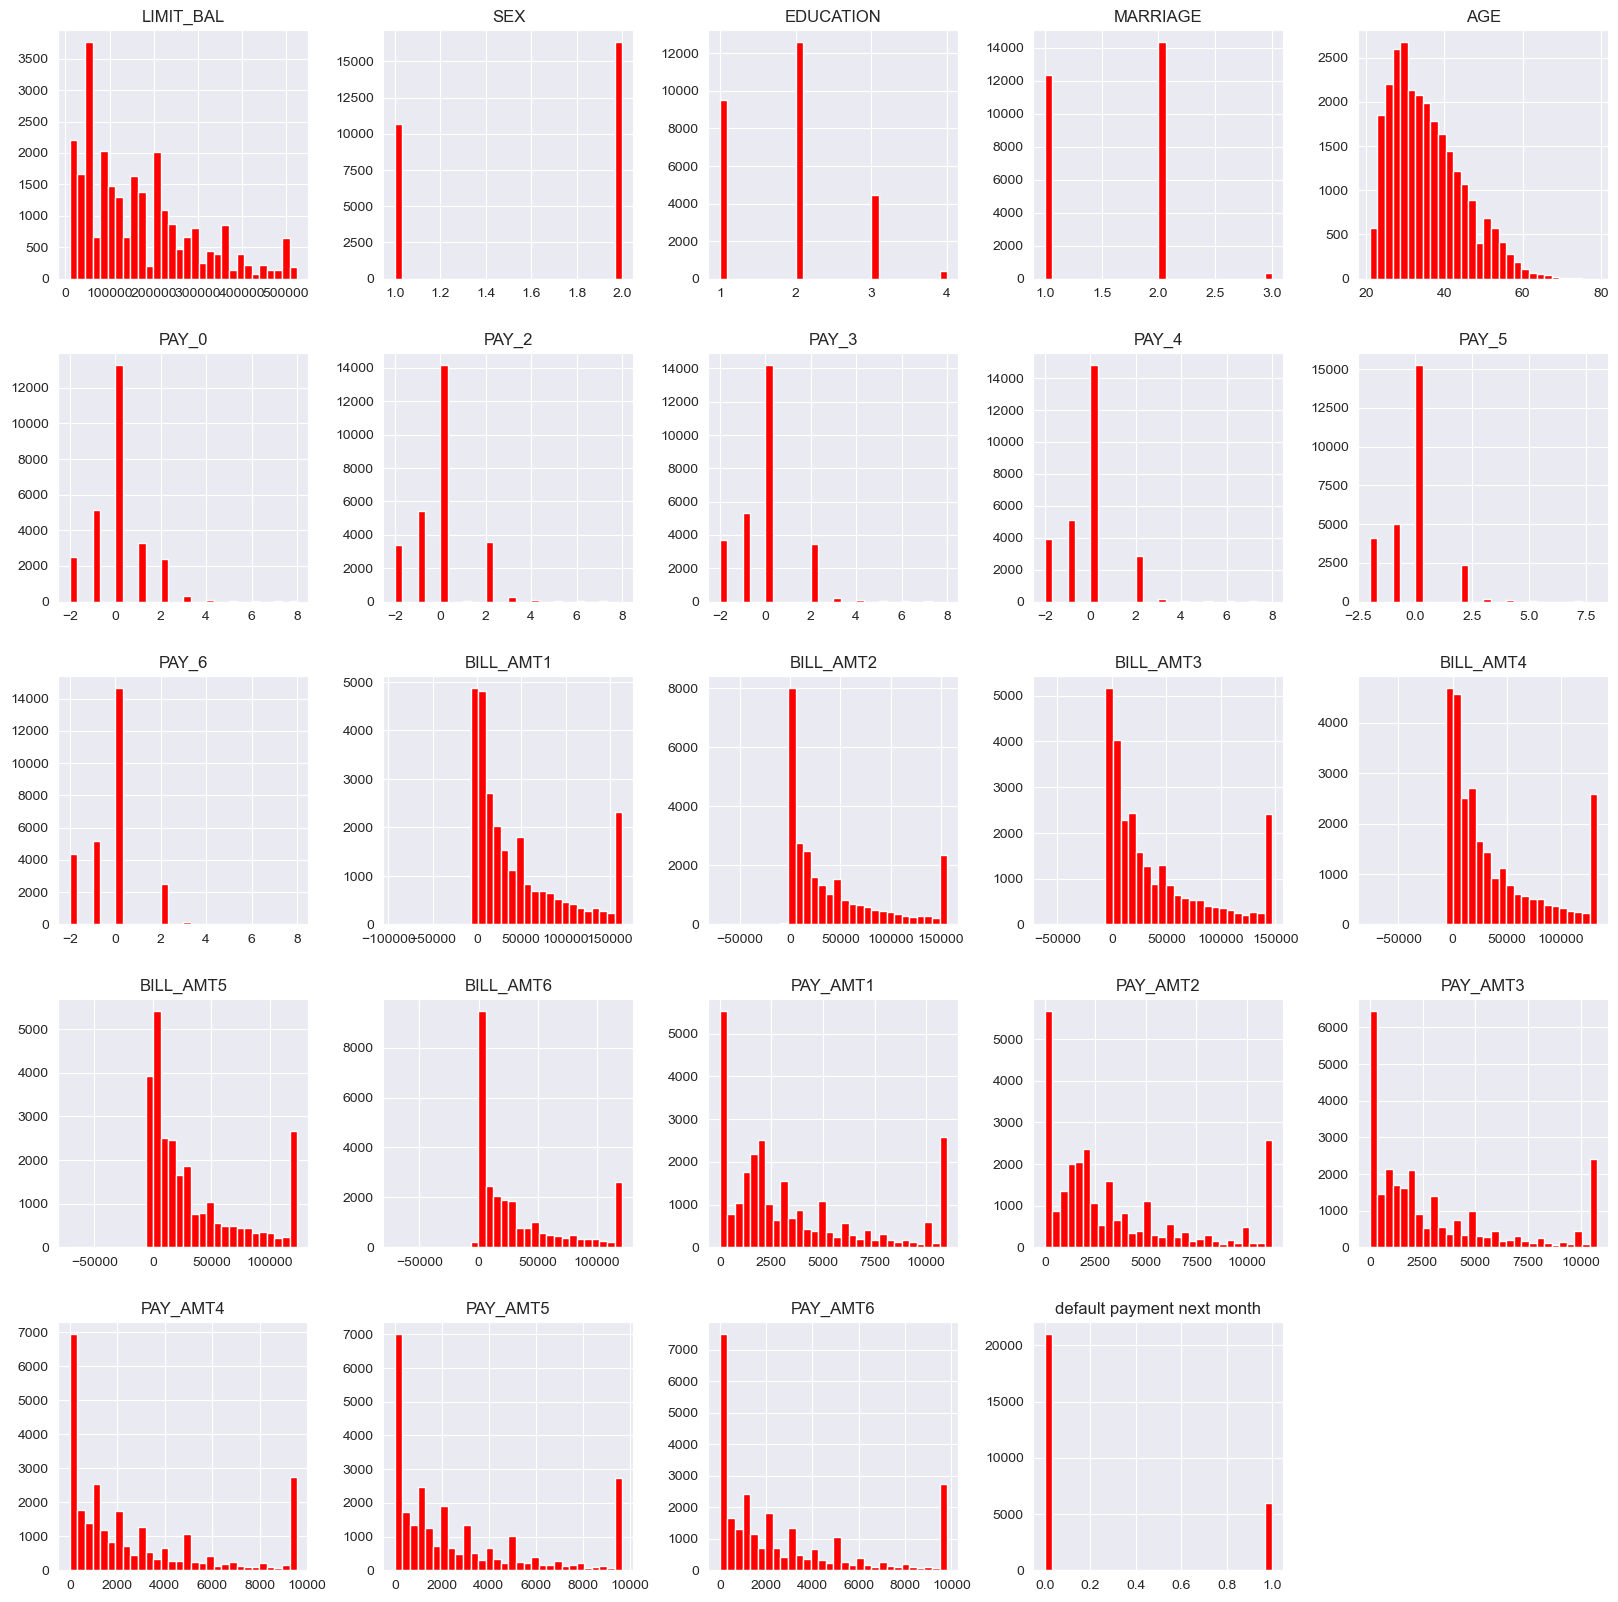

In [253]:
#Perform Data Analysis
print(train_data.hist(bins=30,figsize=(20,20), color='r'))
plt.show()

We can clearly see that the distribution of the data follows power law, which means that general standardization techniques won't be helpful because they assume the data to be gaussian. 

We can apply Median Absolute Deviation(MAD) Scaling which is robust to outliers

In [130]:
def mad_scale(data,feature,test_data):
    median = np.median(data[feature])
    mad = np.median(np.abs(data[feature]- median))
    scaled_test_data = (test_data[feature] - median) / mad
    return (data[feature] - median) / mad,scaled_test_data

In [262]:
test_data['PAY_AMT1']

0        1389.0
1         300.0
2       11012.5
3        1600.0
4       11012.5
         ...   
2995     2000.0
2996     2282.0
2997     3000.0
2998     1224.0
2999      390.0
Name: PAY_AMT1, Length: 3000, dtype: float64

In [131]:
for i in range(1,7):
    feature='PAY_AMT'+str(i)
    print(feature)
    train_data[feature],test_data[feature]=mad_scale(train_data,feature,test_data)

PAY_AMT1
PAY_AMT2
PAY_AMT3
PAY_AMT4
PAY_AMT5
PAY_AMT6


In [265]:
test_data['PAY_AMT1']


0      -0.369938
1      -0.935358
2       4.626687
3      -0.260384
4       4.626687
          ...   
2995   -0.052700
2996    0.093718
2997    0.466511
2998   -0.455607
2999   -0.888629
Name: PAY_AMT1, Length: 3000, dtype: float64

In [132]:
for i in range(1,7):
    feature='BILL_AMT'+str(i)
    print(feature)
    train_data[feature],test_data[feature]=mad_scale(train_data,feature,test_data)

BILL_AMT1
BILL_AMT2
BILL_AMT3
BILL_AMT4
BILL_AMT5
BILL_AMT6


In [133]:
train_data['AGE'],test_data['AGE']=mad_scale(train_data,'AGE',test_data)

In [134]:
train_data['LIMIT_BAL'],test_data['LIMIT_BAL']=mad_scale(train_data,'LIMIT_BAL',test_data)

[[<AxesSubplot: title={'center': 'LIMIT_BAL'}>
  <AxesSubplot: title={'center': 'SEX'}>
  <AxesSubplot: title={'center': 'EDUCATION'}>
  <AxesSubplot: title={'center': 'MARRIAGE'}>
  <AxesSubplot: title={'center': 'AGE'}>]
 [<AxesSubplot: title={'center': 'PAY_0'}>
  <AxesSubplot: title={'center': 'PAY_2'}>
  <AxesSubplot: title={'center': 'PAY_3'}>
  <AxesSubplot: title={'center': 'PAY_4'}>
  <AxesSubplot: title={'center': 'PAY_5'}>]
 [<AxesSubplot: title={'center': 'PAY_6'}>
  <AxesSubplot: title={'center': 'BILL_AMT1'}>
  <AxesSubplot: title={'center': 'BILL_AMT2'}>
  <AxesSubplot: title={'center': 'BILL_AMT3'}>
  <AxesSubplot: title={'center': 'BILL_AMT4'}>]
 [<AxesSubplot: title={'center': 'BILL_AMT5'}>
  <AxesSubplot: title={'center': 'BILL_AMT6'}>
  <AxesSubplot: title={'center': 'PAY_AMT1'}>
  <AxesSubplot: title={'center': 'PAY_AMT2'}>
  <AxesSubplot: title={'center': 'PAY_AMT3'}>]
 [<AxesSubplot: title={'center': 'PAY_AMT4'}>
  <AxesSubplot: title={'center': 'PAY_AMT5'}>
  <A

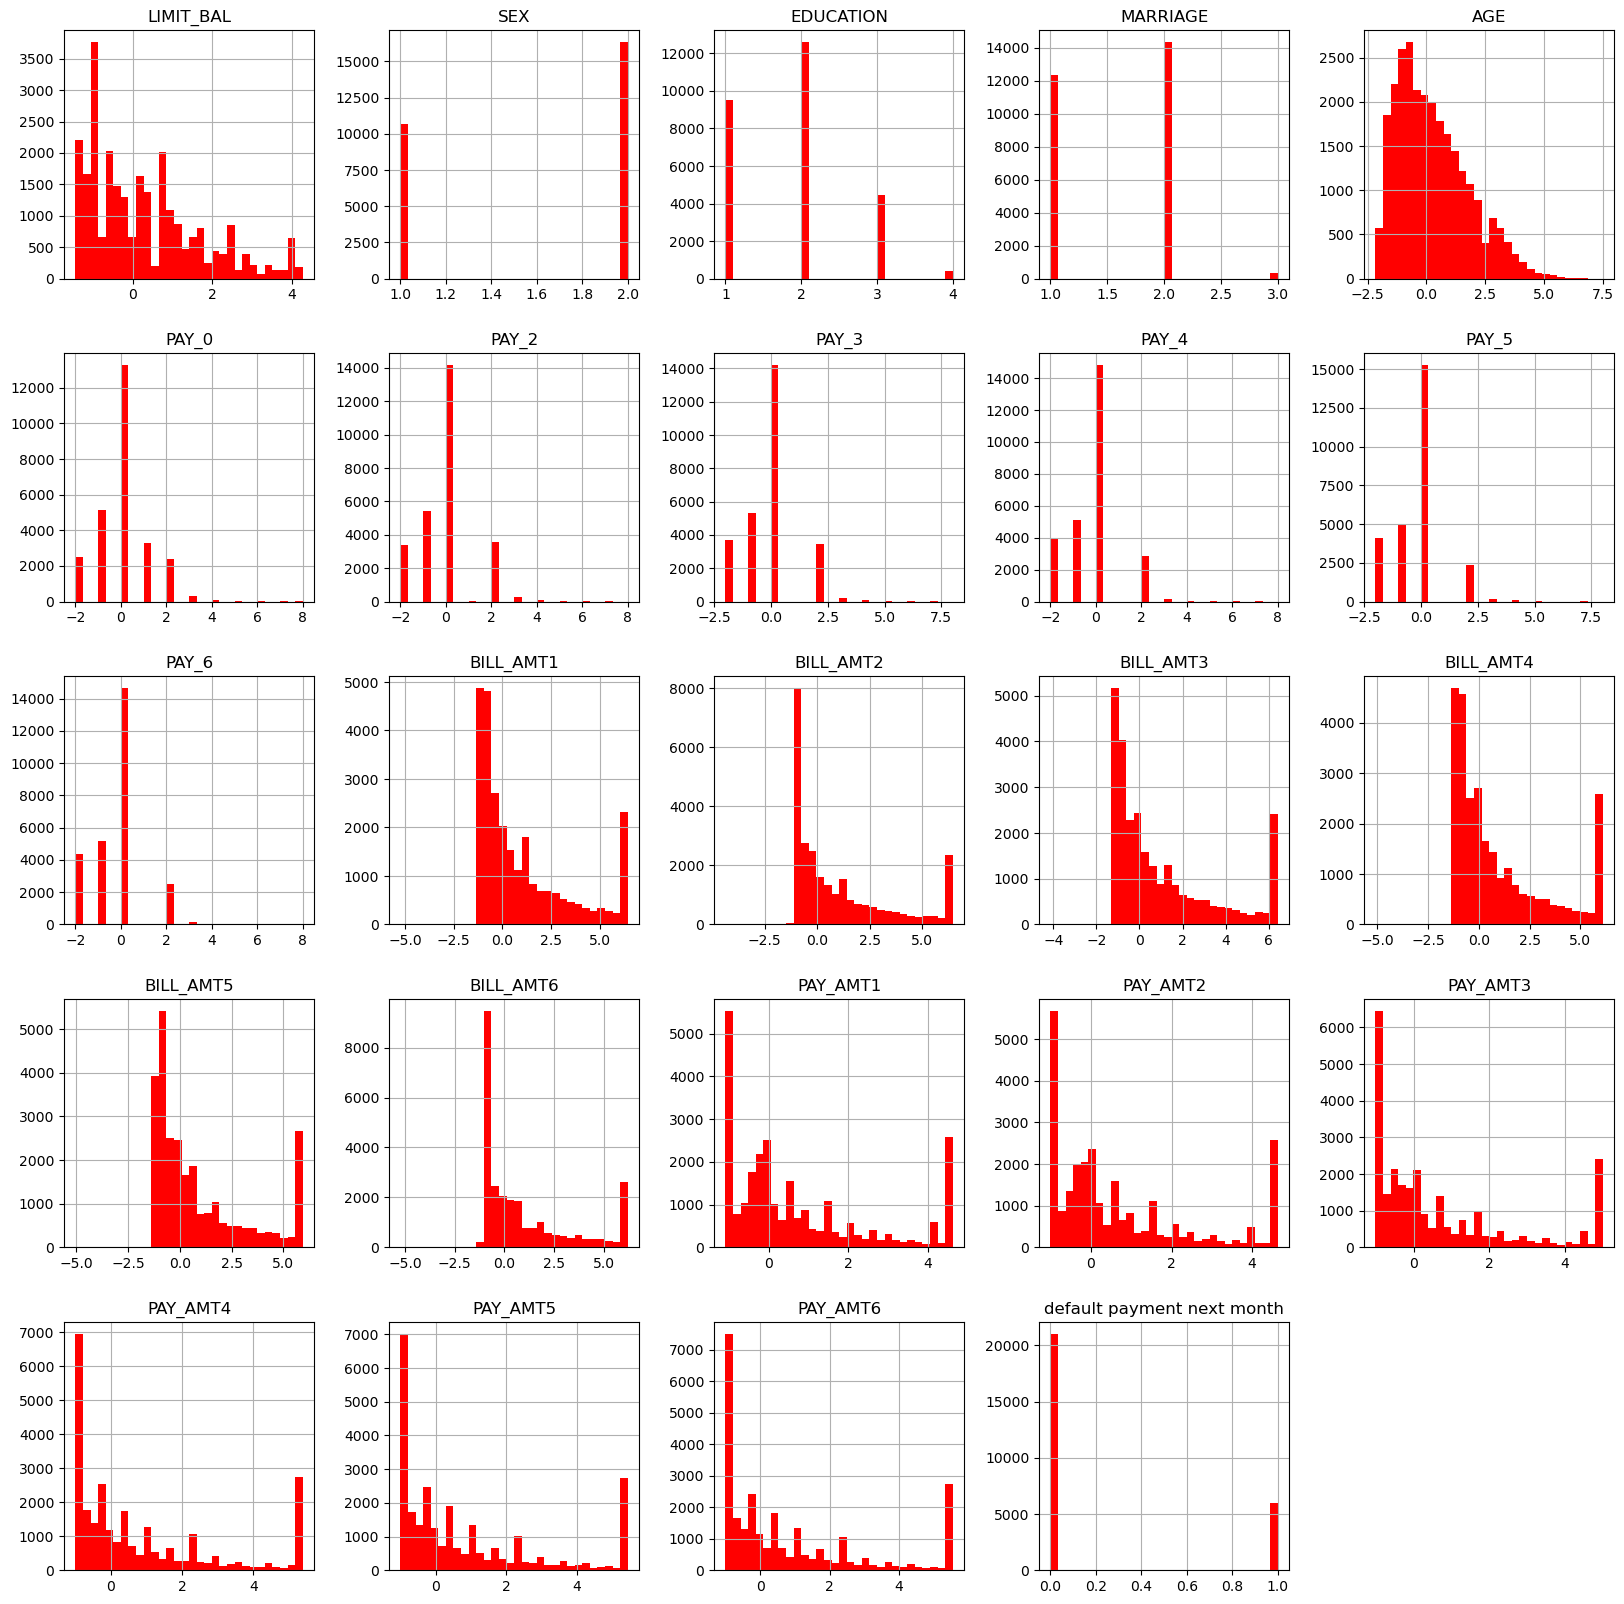

In [17]:
#Perform Data Analysis
print(train_data.hist(bins=30, figsize=(20, 20), color='r'))
plt.show()

Correcting class imbalance by using SMOTE

In [136]:
X_train = train_data.drop('default payment next month', axis=1)
Y_train = train_data['default payment next month']
X_test = test_data.drop('default payment next month', axis=1)
Y_test = test_data['default payment next month']

In [139]:
print("Before applying SMOTE: ",Counter(Y_train))
SMOTE= SMOTE()


X_train_res,Y_train_res= SMOTE.fit_resample(X_train,Y_train)

# summarize class distribution
print("After applying SMOTE: ",Counter(Y_train_res))

Before applying SMOTE:  Counter({0: 21028, 1: 5972})
After applying SMOTE:  Counter({1: 21028, 0: 21028})


Creating four more different sets of data for experimentation

1) Keeping first three months

In [19]:
features_to_drop = ['BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','PAY_4','PAY_5','PAY_6']
X_train_first3 = X_train_res.drop(features_to_drop, axis=1)
X_test_first3 = X_test.drop(features_to_drop, axis=1)


2) Keeping last three months

In [20]:
features_to_drop = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
                    'PAY_0', 'PAY_2', 'PAY_3']
X_train_last3 = X_train_res.drop(features_to_drop, axis=1)
X_test_last3 = X_test.drop(features_to_drop, axis=1)


3) Keeping first, middle and last month

In [21]:
features_to_drop = ['BILL_AMT2', 'BILL_AMT4', 'BILL_AMT6',
                    'PAY_2', 'PAY_4', 'PAY_6']
X_train_middle = X_train_res.drop(features_to_drop, axis=1)
X_test_middle = X_test.drop(features_to_drop, axis=1)


4) Keeping first and last month

In [22]:
features_to_drop = ['BILL_AMT4','BILL_AMT3','BILL_AMT2', 'BILL_AMT5','PAY_2','PAY_3','PAY_4','PAY_5']
X_train_fl = X_train_res.drop(features_to_drop, axis=1)
X_test_fl = X_test.drop(features_to_drop, axis=1)

Keeping PAY_I and removing all bill amount except first

In [23]:
features_to_drop = ['BILL_AMT4','BILL_AMT3','BILL_AMT2', 'BILL_AMT5','BILL_AMT6']
X_train_f = X_train_res.drop(features_to_drop, axis=1)
X_test_f = X_test.drop(features_to_drop, axis=1)

Trivial System

In [278]:
N0 = Y_train.value_counts()
N0

0    21028
1     5972
Name: default payment next month, dtype: int64

Without SMOTE

In [299]:
N0 = Y_train.value_counts()[0]
N1 = Y_train.value_counts()[1]
N = N0 + N1

# output random class assignments with probabilities N0/N and N1/N
class_assignments = []
for i in range(N):
    preds = random.choices([0,1], weights=[N0/N, N1/N])[0]
    class_assignments.append(preds)
class_assignments_test = []
for i in range(len(X_test)):
    preds_test = random.choices([0, 1], weights=[N0/N, N1/N])[0]
    class_assignments_test.append(preds_test)  


In [31]:
def performance_metrics(Y_train, class_assignments):
    # compute accuracy
    accuracy = accuracy_score(Y_train, class_assignments)
    print("Accuracy:", accuracy)

    # compute f1-score
    f1 = f1_score(Y_train, class_assignments)
    print("F1-score:", f1)

    # compute confusion matrix
    cm = confusion_matrix(Y_train, class_assignments)
    cm_display = ConfusionMatrixDisplay(cm).plot()
    print("Confusion matrix:\n", cm_display)


Accuracy: 0.6577037037037037
F1-score: 0.21784021665538253
Confusion matrix:


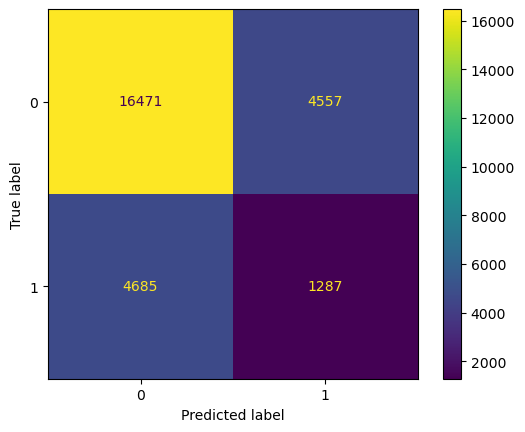

In [301]:
performance_metrics(Y_train, class_assignments)


Accuracy: 0.651
F1-score: 0.23408924652523774
Confusion matrix:


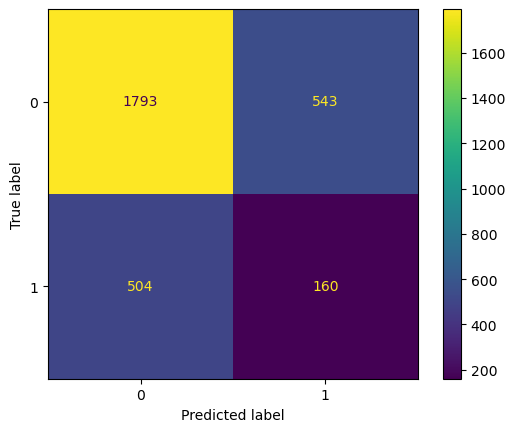

In [302]:
performance_metrics(Y_test, class_assignments_test)

With SMOTE

In [303]:
N0 = Y_train_res.value_counts()[0]
N1 = Y_train_res.value_counts()[1]
N = N0 + N1

# output random class assignments with probabilities N0/N and N1/N
class_assignments = []
for i in range(N):
    preds = random.choices([0,1], weights=[N0/N, N1/N])[0]
    class_assignments.append(preds)
class_assignments_test = []
for i in range(len(X_test)):
    preds_test = random.choices([0, 1], weights=[N0/N, N1/N])[0]
    class_assignments_test.append(preds_test)


Accuracy: 0.49652843827277915
F1-score: 0.49724570234590176
Confusion matrix:


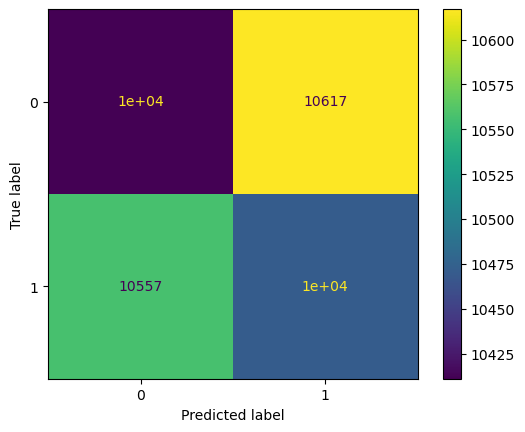

In [304]:
performance_metrics(Y_train_res, class_assignments)

Accuracy: 0.5203333333333333
F1-score: 0.3272557269752221
Confusion matrix:


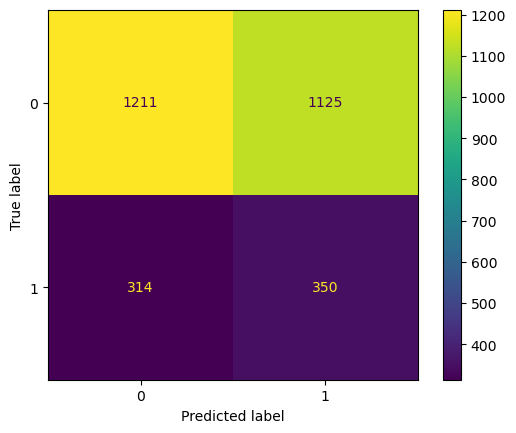

In [305]:
performance_metrics(Y_test, class_assignments_test)

Baseline System

Nearest Means Classifier

Without SMOTE

In [121]:
clf = NearestCentroid()

# fit the model using the training data
clf.fit(X_train, Y_train)

# predict class labels for test data
y_pred = clf.predict(X_train)

Accuracy: 0.6015555555555555
F1-score: 0.4333122629582806
Confusion matrix:


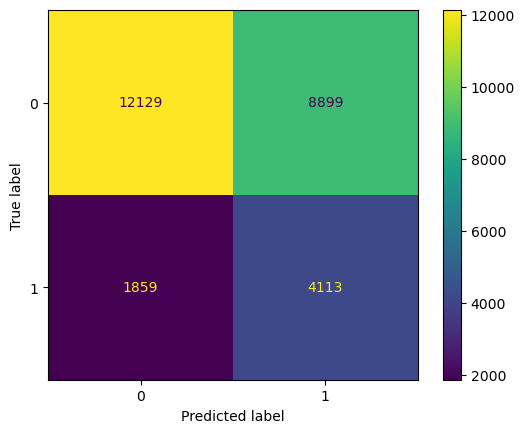

In [307]:
performance_metrics(Y_train, y_pred)

Accuracy: 0.6
F1-score: 0.43925233644859807
Confusion matrix:


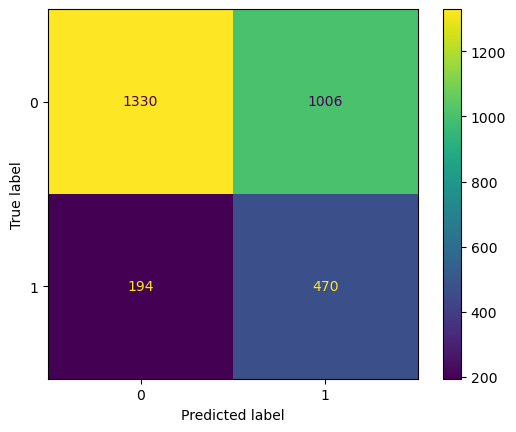

In [308]:
y_pred_test = clf.predict(X_test)
performance_metrics(Y_test, y_pred_test)

With SMOTE

In [143]:
clf = NearestCentroid()

# fit the model using the training data
clf.fit(X_train_res, Y_train_res)

# predict class labels for test data
y_pred = clf.predict(X_train_res)


Below are the baseline values

Accuracy: 0.6361755754232452
F1-score: 0.6581622394495208
Confusion matrix:


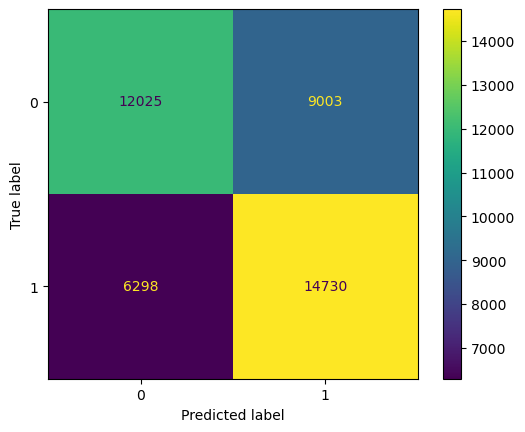

In [34]:
performance_metrics(Y_train_res, y_pred)


Accuracy: 0.5936666666666667
F1-score: 0.43433874709976805
Confusion matrix:


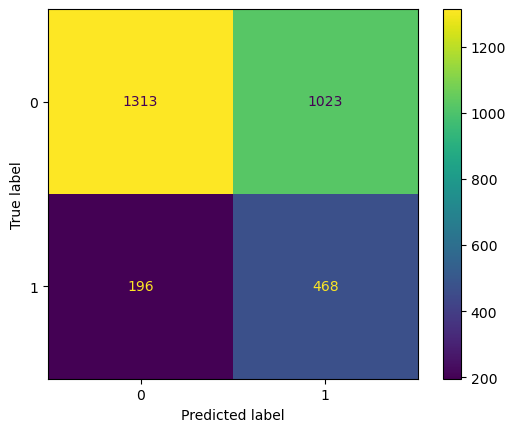

In [144]:
y_pred_test = clf.predict(X_test)
performance_metrics(Y_test, y_pred_test)

Both F1 Score and Accuracy improved

Lets check if hyperparameter tuning improves the result

In [311]:
def tuning_NMS(X_train, Y_train):
    param_grid = {
        'metric': ['euclidean', 'manhattan', 'minkowski'],
        'shrink_threshold': [None, 0.1, 0.5, 1.0]
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # create a NearestCentroid classifier object
    clf = NearestCentroid()

    # create a GridSearchCV object to perform hyperparameter tuning
    search_grid = GridSearchCV(
        clf,
        param_grid=param_grid,
        cv=cv,
        scoring='f1',
        n_jobs=-1
    )


    # perform hyperparameter tuning using GridSearchCV
    search_grid.fit(X_train, Y_train)

    best_params = search_grid.best_params_
    best_score = search_grid.best_score_

    print(f"Best hyperparameters are: {best_params}")
    print(f"Best F1-score is : {best_score}")



In [312]:
tuning_NMS(X_train, Y_train)

Best hyperparameters are: {'metric': 'euclidean', 'shrink_threshold': 1.0}
Best F1-score is : 0.43531683779166164


In [314]:
tuning_NMS(X_train_res, Y_train_res)

Best hyperparameters are: {'metric': 'euclidean', 'shrink_threshold': 1.0}
Best F1-score is : 0.6556285489392987


We can see no improvement here

KNN

Without SMOTE

In [315]:
def tuning_knn(X_train, Y_train):
    knn = KNeighborsClassifier()
    # Define the parameter grid to search over
    list_of_paramters = {
        'n_neighbors': [3, 4,5,6, 7, 9],
        'weights': ['uniform', 'distance'],
        'p': [1, 2],
    }
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    search_grid = GridSearchCV(
        knn,
        param_grid=list_of_paramters,
        cv=cv,
        scoring='f1',
        n_jobs=-1
    )


    # Perform a grid search to find the best hyperparameters
    search_grid.fit(X_train, Y_train)

    # Print the best hyperparameters and the corresponding score
    print("Best hyperparameters are: ", search_grid.best_params_)
    print("Best F1-score is: {:.2f}".format(search_grid.best_score_))

In [316]:
tuning_knn(X_train, Y_train)

Best hyperparameters are:  {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
Best F1-score is: 0.43


In [317]:
def knn(n_neighbors, p, weights,X_train, Y_train,X_test,Y_test):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors, p=p, weights=weights)
    clf.fit(X_train, Y_train)
    print("Train Data")
    # make predictions on the test data
    y_pred = clf.predict(X_train)
    performance_metrics(Y_train, y_pred)
    print("test data")
    y_pred_test = clf.predict(X_test)
    performance_metrics(Y_test, y_pred_test)



Without SMOTE

Train Data
Accuracy: 0.9993333333333333
F1-score: 0.9984919571045575
Confusion matrix:
test data
Accuracy: 0.7903333333333333
F1-score: 0.4287011807447775
Confusion matrix:


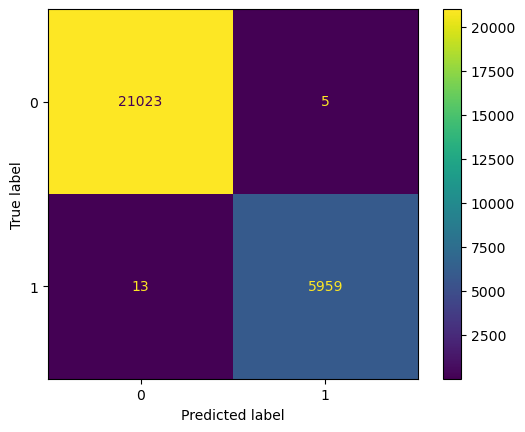

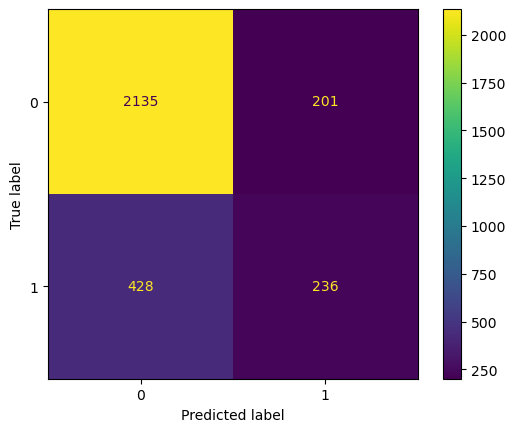

In [318]:
knn(5,2,'distance',X_train, Y_train,X_test,Y_test)

We can clearly see overfit here

Using SMOTE

In [319]:
tuning_knn(X_train_res, Y_train_res)

Best hyperparameters are:  {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
Best F1-score is: 0.85


But after trying many compbinations of neighbors, we got 1000 neighbors as optimal

Train Data
Accuracy: 0.9995719992391098
F1-score: 0.9995718363463368
Confusion matrix:
test data
Accuracy: 0.7076666666666667
F1-score: 0.4927703875072296
Confusion matrix:


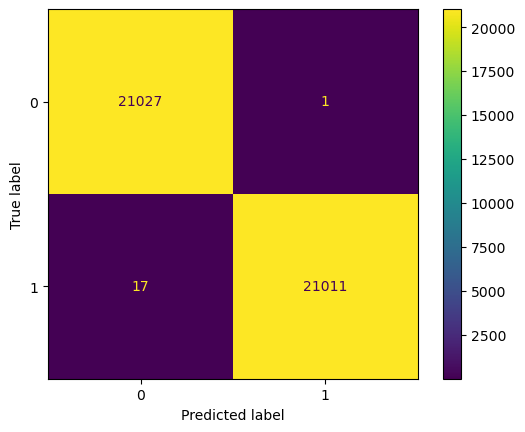

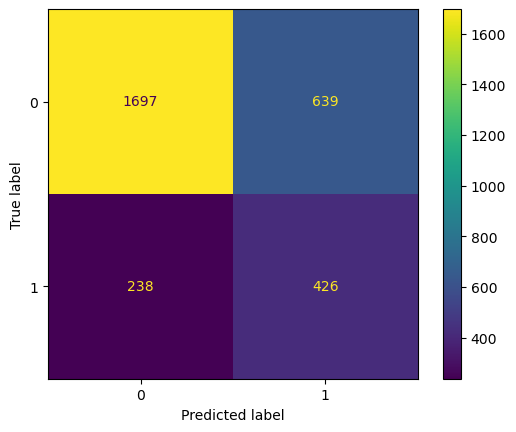

In [321]:
knn(1000,1,'distance',X_train_res, Y_train_res,X_test,Y_test)

We can see that this model is performing even worse when using SMOTE

Support Vector Machines

Without SMOTE

In [36]:
def svm_(X_train, Y_train,X_test, Y_test):
    # initialize the SVM classifier
    clf = SVC(kernel='rbf')

    # train the model on the training data
    clf.fit(X_train, Y_train)

    print("Train Data")
    # make predictions on the test data
    y_pred = clf.predict(X_train)
    performance_metrics(Y_train, y_pred)
    print("test data")
    y_pred_test = clf.predict(X_test)
    performance_metrics(Y_test, y_pred_test)
    return clf
    

Train Data
Accuracy: 0.821925925925926
F1-score: 0.4531392174704276
Confusion matrix:
test data
Accuracy: 0.8183333333333334
F1-score: 0.4398766700924975
Confusion matrix:


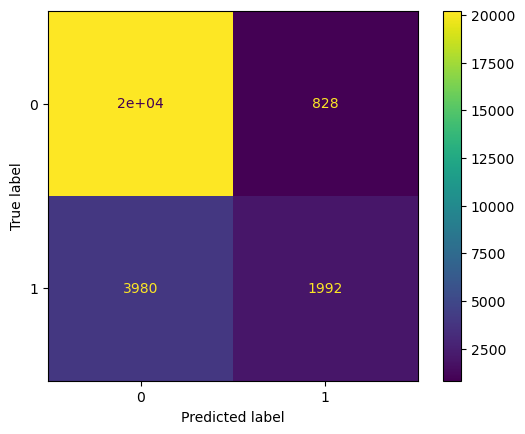

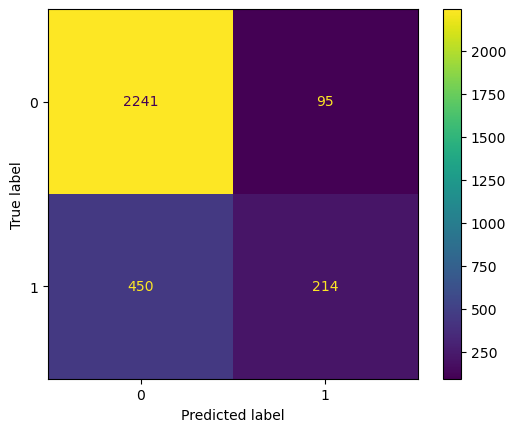

In [323]:
svm_(X_train, Y_train,X_test, Y_test)

With  SMOTE

In [333]:
def svm_tune(X_train_res, Y_train_res):
    # Assuming X_train and y_train are the original train data and labels

    # Train a SVM model on the full feature set
    pca = PCA(n_components=5)
    pca.fit(X_train_res)
    top5_features = pca.transform(X_train_res)
    print("1 done")
    list_of_paramters = {
        'C': [0.01, 0.1, 1]
    }
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    svm_cv = SVC(kernel='rbf')
    search_grid = GridSearchCV(
        svm_cv,
        param_grid=list_of_paramters,
        cv=cv,
        scoring='f1',
        n_jobs=-1
    )
    print("2 done")
    search_grid.fit(top5_features, Y_train_res)

    # Print the best hyperparameters and the corresponding score
    print("Best hyperparameters are: ", search_grid.best_params_)
    print("Best F1-score is: {:.2f}".format(search_grid.best_score_))


In [334]:
svm_tune(X_train_res, Y_train_res)

1 done
2 done
Best hyperparameters are:  {'C': 1}
Best F1-score is: 0.67


Train Data
Accuracy: 0.7487873311774776
F1-score: 0.7394510345507905
Confusion matrix:
test data
Accuracy: 0.7376666666666667
F1-score: 0.5150955021565004
Confusion matrix:


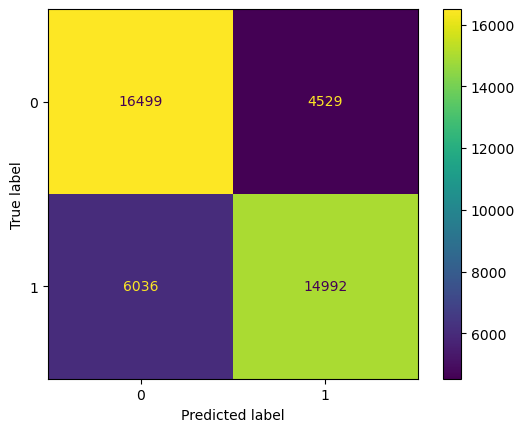

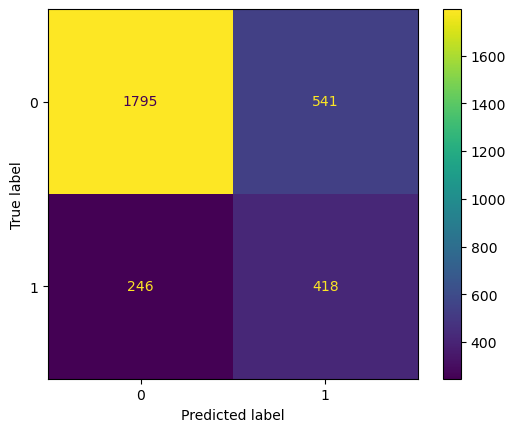

In [37]:
clf = svm_(X_train_res, Y_train_res,X_test, Y_test)

In [44]:
print("The number of support vectors are: ",len(clf.support_vectors_))
classes = 2
print("The degrees of freedom are: ", len(clf.support_vectors_)-classes - 1)


The number of support vectors are:  25769
The degrees of freedom are:  25766


After applying SMOTE, we can clearly see that overfitting has reduced by a big margin but we can see that accuracy has reduced

Neural Networks - MLP

In [51]:
def mlp(X_tr, y_tr,X_te,Y_te):
    # create an MLP object
    mlp = MLPClassifier(hidden_layer_sizes=(20,20,20), activation='relu', solver='adam', max_iter=300,alpha=0.001)

    # train the MLP on the training data
    mlp.fit(X_tr, y_tr)
    print("Train Data")
    # make predictions on the test data
    y_pred = mlp.predict(X_tr)
    #print(y_pred.shape)
    performance_metrics(y_tr, y_pred)
    print("test data")
    y_pred_test = mlp.predict(X_te)
    performance_metrics(Y_te, y_pred_test)
    # make predictions on the test data
    return mlp

Without SMOTE

Train Data
Accuracy: 0.8358148148148148
F1-score: 0.5288553512594325
Confusion matrix:
test data
Accuracy: 0.8093333333333333
F1-score: 0.45000000000000007
Confusion matrix:


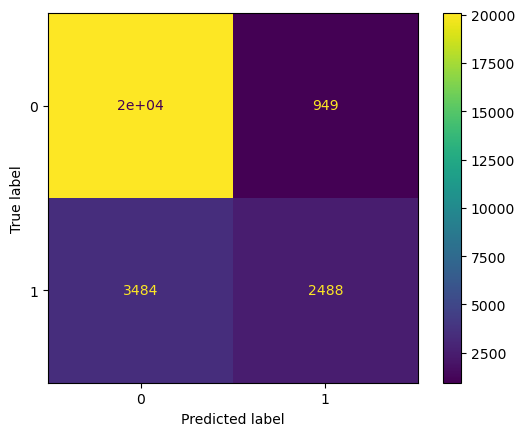

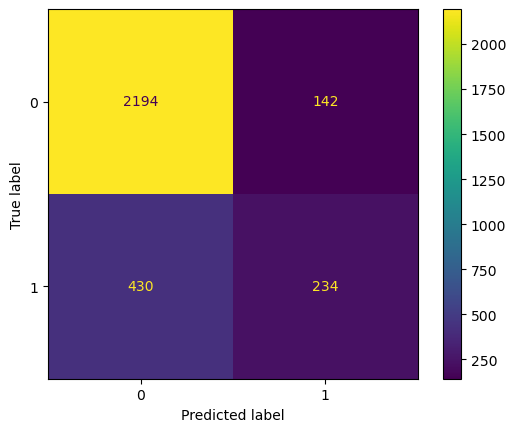

In [326]:
mlp(X_train, Y_train,X_test,Y_test)

With SMOTE

In [335]:
def mlp_tune(X_train_res, Y_train_res):
    pca = PCA(n_components=5)
    pca.fit(X_train_res)
    top5_features = pca.transform(X_train_res)
    print("1 done")
    list_of_paramters = {
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'invscaling', 'adaptive']
    }
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    mlp_cv = MLPClassifier(hidden_layer_sizes=(
        10,), activation='relu', solver='adam', random_state=42)
    search_grid = GridSearchCV(
        mlp_cv,
        param_grid=list_of_paramters,
        cv=cv,
        scoring='f1',
        n_jobs=-1
    )
    print("2 done")
    search_grid.fit(top5_features, Y_train_res)

    # Print the best hyperparameters and the corresponding score
    print("Best hyperparameters are: ", search_grid.best_params_)
    print("Best F1-score is: {:.2f}".format(search_grid.best_score_))

In [336]:
mlp_tune(X_train_res, Y_train_res)


1 done
2 done
Best hyperparameters are:  {'alpha': 0.001, 'learning_rate': 'constant'}
Best F1-score is: 0.68


Train Data
Accuracy: 0.7761080464143048
F1-score: 0.7696898542217003
Confusion matrix:
test data
Accuracy: 0.7273333333333334
F1-score: 0.48875
Confusion matrix:


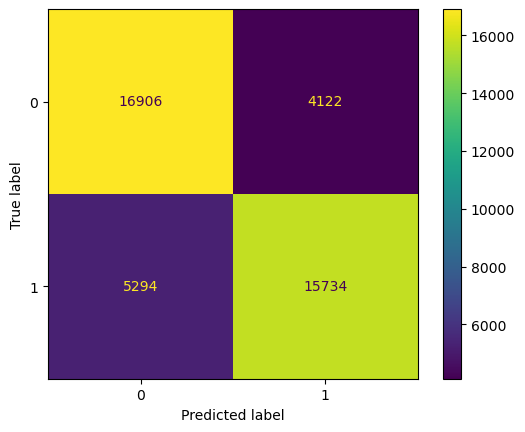

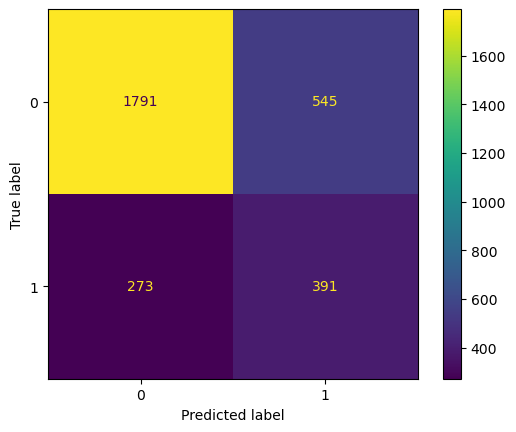

In [53]:
mlp1 = mlp(X_train_res, Y_train_res,X_test,Y_test)

In [72]:
WEIGHT_N = sum((layer_size + 1) * next_layer_size for layer_size,
                next_layer_size in zip(mlp1.hidden_layer_sizes, mlp1.hidden_layer_sizes[1:]))
WEIGHT_N += (mlp1.n_outputs_ * (mlp1.hidden_layer_sizes[-1] + 1))
print("Total number of weights in the MLP model: ",WEIGHT_N)


Total number of weights in the MLP model:  861


In [73]:
BIAS_T = sum([b.size for b in mlp1.intercepts_])
print("Total bias values: ", BIAS_T)


Total bias values:  61


In [74]:
total_dof = WEIGHT_N + BIAS_T
print("DOF : ",total_dof)

DOF :  922


In [34]:
print(X_train_res.shape)
print(Y_train_res.shape)

(42056, 23)
(42056,)


Random Forest Classifier

In [99]:
def tune_random(X_tr, y_tr):

    list_of_paramters = {
        'n_estimators': [50, 100, 200,300],
        'max_depth': [5, 10, 20, 15],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Create a random forest classifier object
    clf = RandomForestClassifier(random_state=42, class_weight='balanced')

    search_grid_n = GridSearchCV(
        clf,
        param_grid=list_of_paramters,
        cv=cv,
        scoring='f1',
        n_jobs=-1
    )

    search_grid_n.fit(X_tr, y_tr)

    best_p = search_grid_n.best_params_
    b_score = search_grid_n.best_score_

    print(f"Best hyperparameters are: {best_p}")
    print(f"Best F1-score is: {b_score}")



In [118]:
def random_f(X_tr, y_tr, X_te, Y_te, max_depth, max_features, min_samples_leaf, min_samples_split, n_estimators):
    rf = RandomForestClassifier(max_depth= max_depth, max_features= max_features, min_samples_leaf= min_samples_leaf, min_samples_split= min_samples_split, n_estimators= n_estimators)

    # Train the classifier on the training data
    rf.fit(X_tr, y_tr)
    print("Train Data")
    # make predictions on the test data
    with open('model.pkl', 'wb') as file:
        pickle.dump(rf, file)
    y_pred = rf.predict(X_tr)
    #print(y_pred.shape)
    performance_metrics(y_tr, y_pred)
    print("test data")
    y_pred_test = rf.predict(X_te)
    performance_metrics(Y_te, y_pred_test)
    # make predictions on the test data

In [62]:
tune_random(X_train, Y_train)

Best hyperparameters are: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best F1-score is: 0.801536613849821


Train Data
Accuracy: 0.8533703703703703
F1-score: 0.5663270894950159
Confusion matrix:
test data
Accuracy: 0.8203333333333334
F1-score: 0.46686449060336305
Confusion matrix:


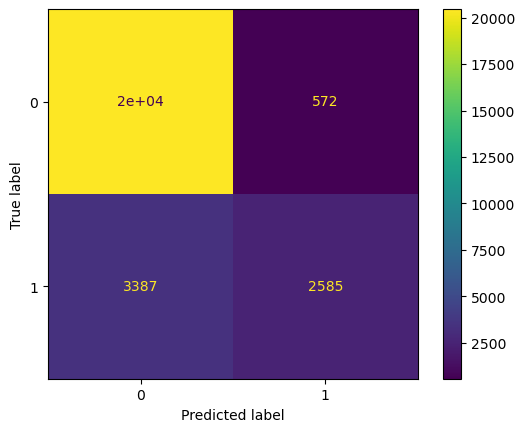

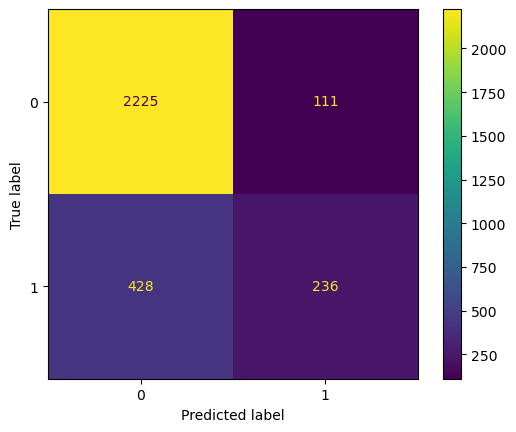

In [112]:
random_f(X_train, Y_train,X_test,Y_test,10,'sqrt',2,5,150)

We can clearly see here that False positives are more than True Negative which is causing low F1 score

In [74]:
tune_random(X_train_res, Y_train_res)

Best hyperparameters are: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best F1-score is: 0.8541213070400792


But these parameters are causing over fitting

Train Data
Accuracy: 0.7946547460528819
F1-score: 0.7808789201258499
Confusion matrix:
test data
Accuracy: 0.772
F1-score: 0.5378378378378379
Confusion matrix:


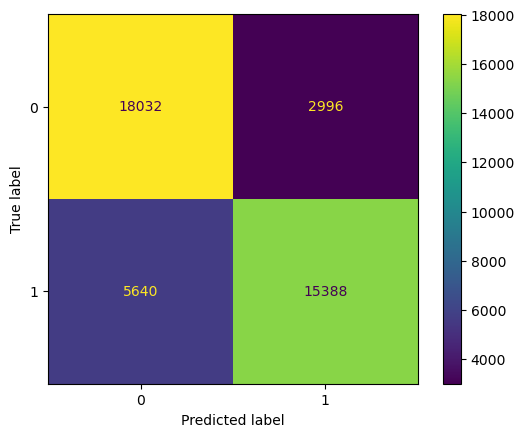

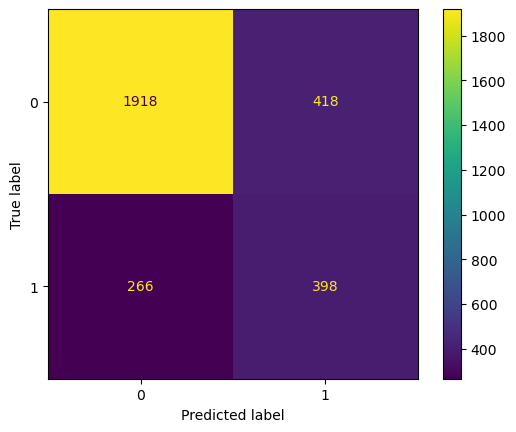

In [280]:
random_f(X_train_res, Y_train_res,X_test,Y_test,10,'sqrt',1,2,200)

This is performing the best 

In [4]:
with open('model.pkl', 'rb') as file:
    rf = pickle.load(file)

Lets plot feature importance using the best model

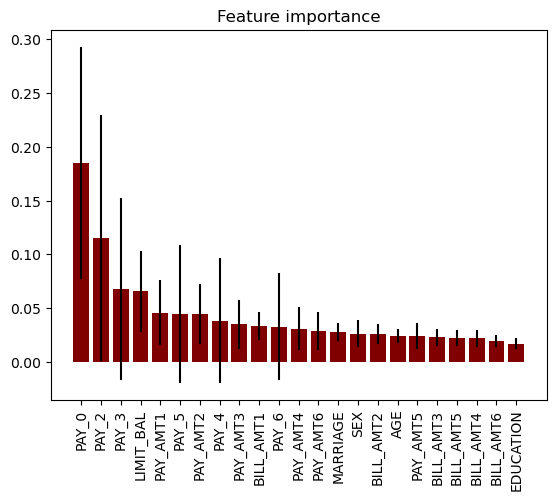

In [28]:
imp = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
ind = np.argsort(imp)[::-1]
plt.figure()
plt.title("Feature importance")
plt.bar(range(X_train_res.shape[1]), imp[ind],
        yerr=std[ind], align="center", color='maroon')
plt.xticks(range(X_train_res.shape[1]),
           X_train_res.columns[ind], rotation='vertical')
plt.show()


In [ ]:
with open('model.pkl', 'wb') as file:
    pickle.dump(rf, file)

We can see that the accuracy has reduced but F1 SCORE has increased

Train Data
Accuracy: 0.8038329845919726
F1-score: 0.7932641708013833
Confusion matrix:
test data
Accuracy: 0.774
F1-score: 0.5425101214574899
Confusion matrix:


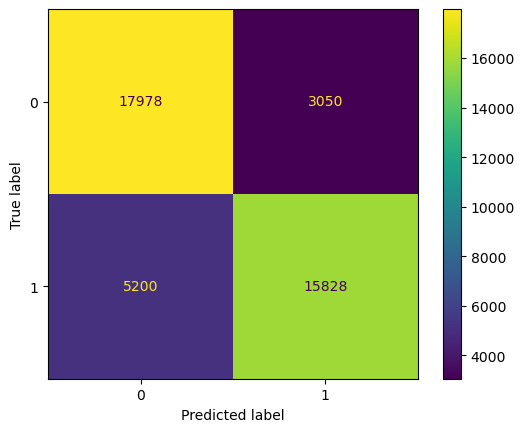

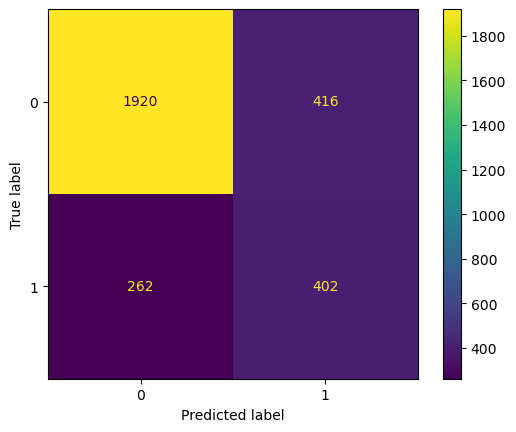

In [107]:
random_f(X_train_first3, Y_train_res,X_test_first3,Y_test,10,'sqrt',1,2,300)

Train Data
Accuracy: 0.7889242914209625
F1-score: 0.7836935597845951
Confusion matrix:
test data
Accuracy: 0.72
F1-score: 0.46291560102301793
Confusion matrix:


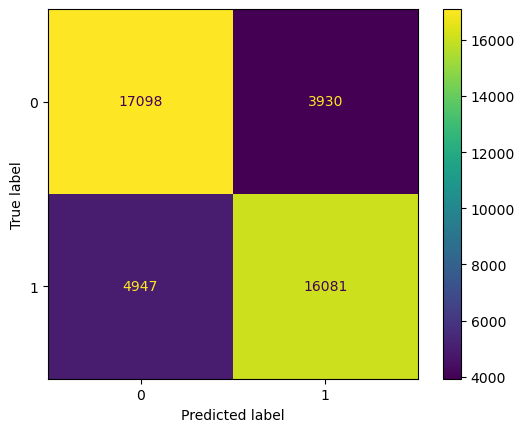

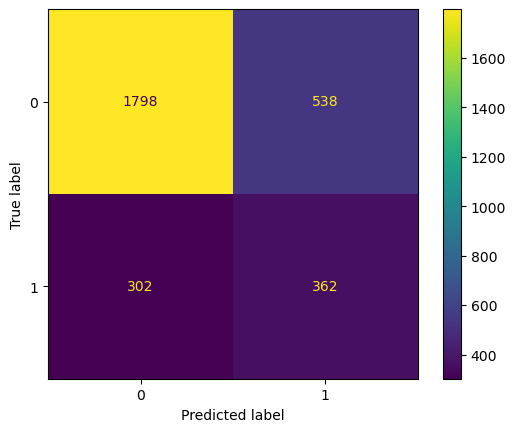

In [108]:
random_f(X_train_last3, Y_train_res,X_test_last3,Y_test,10,'sqrt',1,2,300)

Train Data
Accuracy: 0.8022160928286095
F1-score: 0.7932491549015708
Confusion matrix:
test data
Accuracy: 0.762
F1-score: 0.5246338215712383
Confusion matrix:


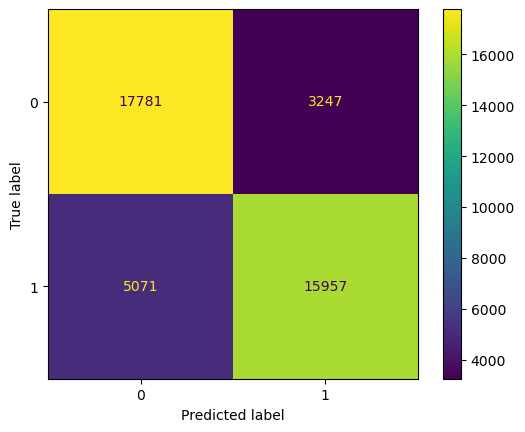

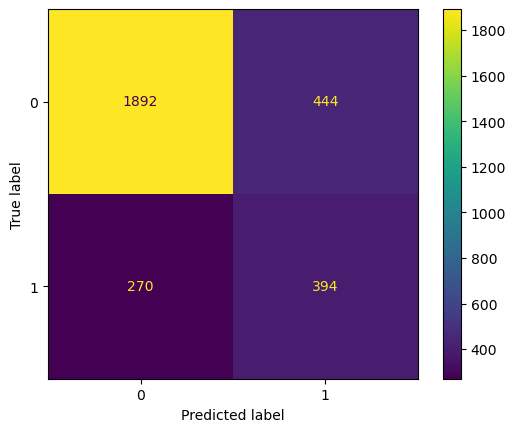

In [109]:
random_f(X_train_fl, Y_train_res,X_test_fl,Y_test,10,'sqrt',1,2,300)

In [156]:
tune_random(X_train_f, Y_train_res,X_test_f,Y_test)

Best hyperparameters are: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best F1-score is: 0.8504591049912257


Train Data
Accuracy: 0.797722084839262
F1-score: 0.7854097823070907
Confusion matrix:
test data
Accuracy: 0.7723333333333333
F1-score: 0.5413028878441907
Confusion matrix:


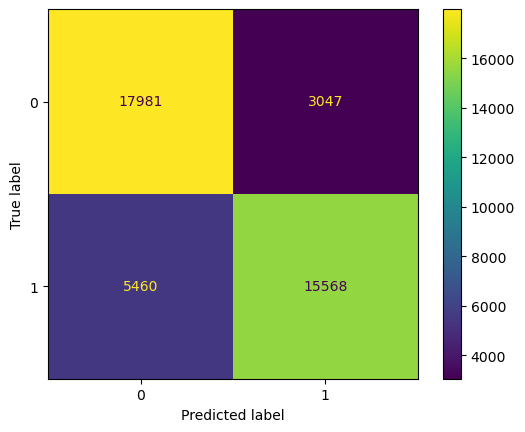

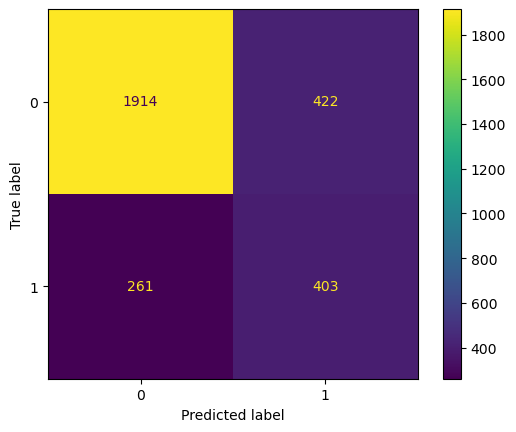

In [110]:
random_f(X_train_f, Y_train_res,X_test_f,Y_test,10,'sqrt',1,2,300)

In this case, we can see that the accuracies and f1 scores are almost the same as the dataset having all the features. It means that removing these specific multicollinear features would be beneficial in making the training time less without lossing on the accuracy. Same goes for the case when we used the first3 dataset

We can see that removing different combinations of months from the data does not improve the performance metrics

Logistic Regression

In [75]:
def tune_logistic(X_tr, y_tr,X_te,Y_te):

    list_of_paramters = {
        'penalty': ['l2','l1'],
        'C': [0.01, 0.1, 1.0,10],
        'solver': ['saga', 'liblinear']
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Create a random forest classifier object
    clf = LogisticRegression()
    search_grid_n = GridSearchCV(
        clf,
        param_grid=list_of_paramters,
        cv=cv,
        scoring='f1',
        n_jobs=-1
    )

    search_grid_n.fit(X_tr, y_tr)

    best_p = search_grid_n.best_params_
    b_score = search_grid_n.best_score_
    print(f"Best hyperparameters are: {best_p}")
    print(f"Best F1-score is: {b_score}")
    clf = LogisticRegression(**best_p)
    clf.fit(X_tr, y_tr)
    print("Train Data")
    # make predictions on the test data
    y_pred = clf.predict(X_tr)
    #print(y_pred.shape)
    performance_metrics(y_tr, y_pred)
    print("test data")
    y_pred_test = clf.predict(X_te)
    performance_metrics(np.array(Y_te), y_pred_test)
    return clf


Without SMOTE

Best hyperparameters are: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best F1-score is: 0.7691718112178549
Train Data
Accuracy: 0.8081111111111111
F1-score: 0.35310275939567987
Confusion matrix:
test data
Accuracy: 0.8093333333333333
F1-score: 0.3470319634703196
Confusion matrix:


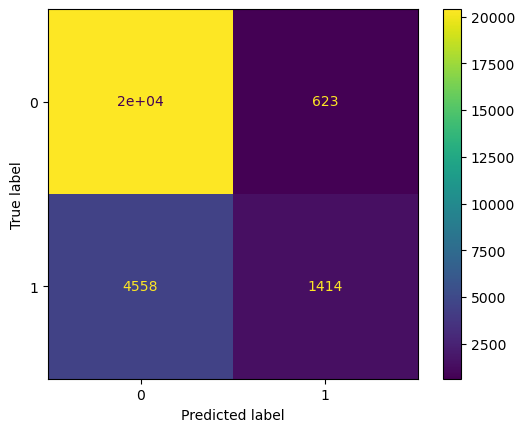

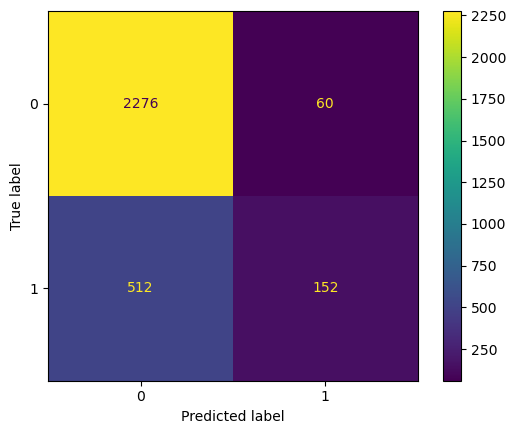

In [113]:
tune_logistic(X_train, Y_train,X_test,Y_test)

With SMOTE

Best hyperparameters are: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
Best F1-score is: 0.7009830077473913
Train Data
Accuracy: 0.7029199163020734
F1-score: 0.7021408477566395
Confusion matrix:
test data
Accuracy: 0.684
F1-score: 0.46136363636363636
Confusion matrix:


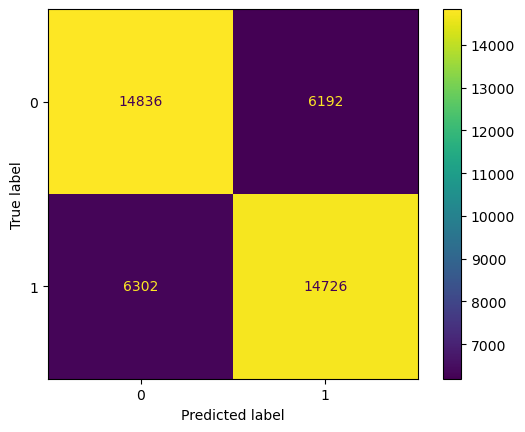

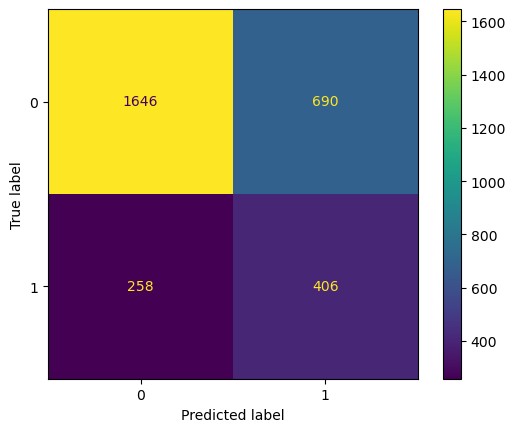

In [81]:
clf_l = tune_logistic(X_train_res, Y_train_res,X_test,Y_test)

In [79]:
n_coef = len(clf_l.coef_[0]) + 1

df = X_train_res.shape[0] - n_coef
print("DOF",df)

DOF 42032


Best hyperparameters are: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best F1-score is: 0.7006847534316283
Train Data
Accuracy: 0.7012792467186608
F1-score: 0.7002028397565924
Confusion matrix:
test data
Accuracy: 0.686
F1-score: 0.4641638225255973
Confusion matrix:


LogisticRegression(C=10, penalty='l1', solver='liblinear')

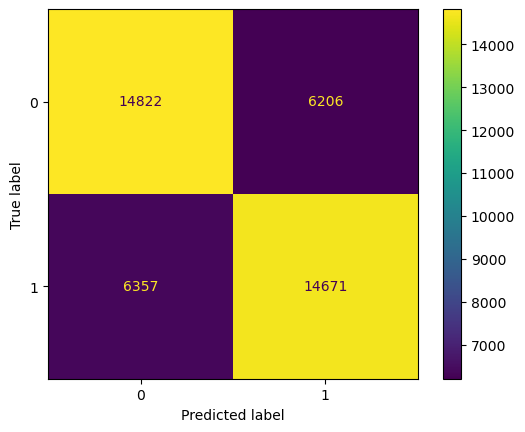

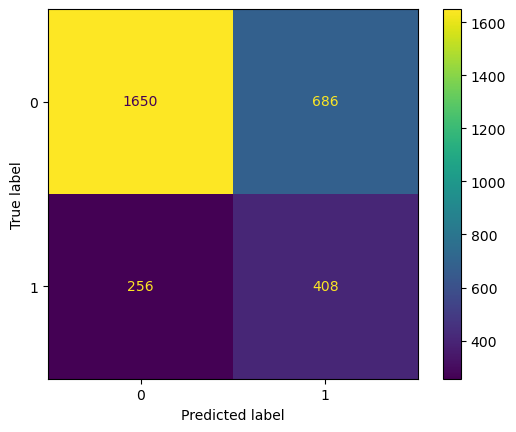

In [82]:
tune_logistic(X_train_first3, Y_train_res,X_test_first3,Y_test)

Best hyperparameters are: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best F1-score is: 0.6797487626229897
Train Data
Accuracy: 0.6756943123454442
F1-score: 0.6796175800427522
Confusion matrix:
test data
Accuracy: 0.644
F1-score: 0.42207792207792205
Confusion matrix:


LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

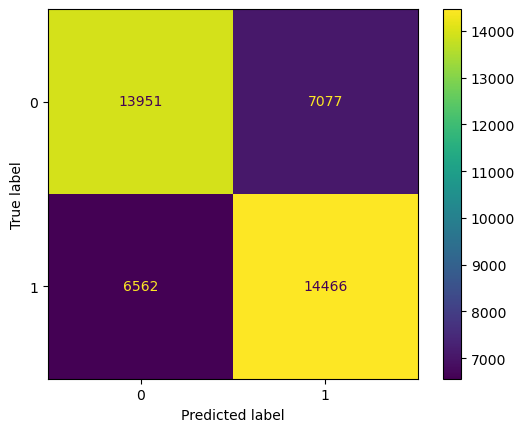

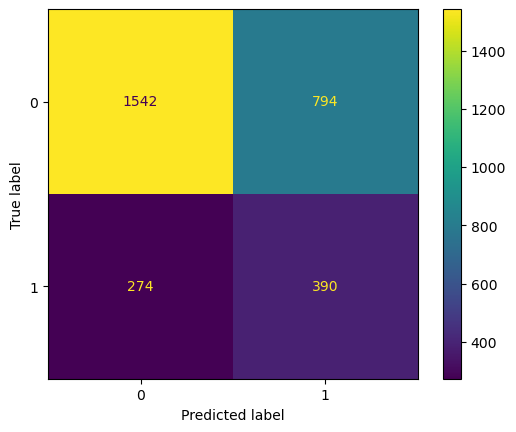

In [83]:
tune_logistic(X_train_last3, Y_train_res,X_test_last3,Y_test)

Best hyperparameters are: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
Best F1-score is: 0.6994993795157213
Train Data
Accuracy: 0.6993294654746053
F1-score: 0.6993509118143562
Confusion matrix:
test data
Accuracy: 0.6766666666666666
F1-score: 0.4513574660633484
Confusion matrix:


LogisticRegression(C=10, solver='saga')

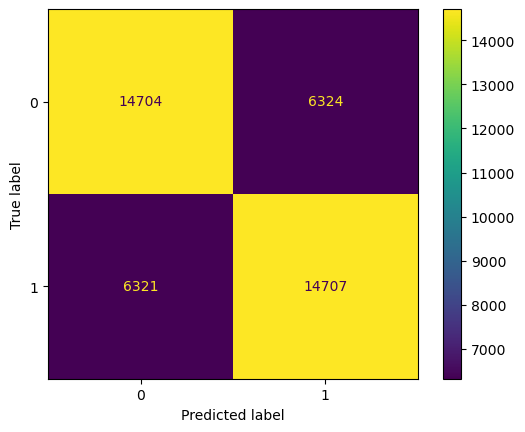

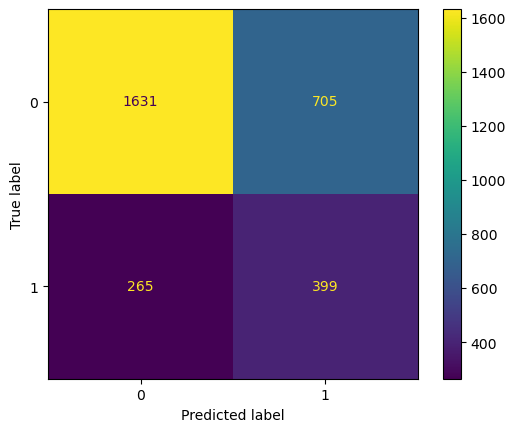

In [84]:
tune_logistic(X_train_fl, Y_train_res,X_test_fl,Y_test)

We can see that Accuracy has actually reduced after using SMOTE 

Now lets try encoding some of the categorical variables using one hot encoding and see if there is any improvement in any results

In [94]:
X_train_new = X_train_res

In [105]:
X_test_new = X_test

In [106]:
X_test_new


LIMIT_BAL     SEX        EDUCATION MARRIAGE       AGE  PAY_0  PAY_2  \
0     -1.222222    MALE       university  married -1.500000     -1     -1   
1     -1.000000  FEMALE      high school  married  2.833333     -1     -1   
2      2.111111    MALE  graduate school   single  1.666667      0      0   
3      3.555556  FEMALE      high school  married  1.333333      0      0   
4      2.000000    MALE       university   single -0.833333      0      0   
...         ...     ...              ...      ...       ...    ...    ...   
2995   1.888889  FEMALE       university   single -0.500000      0      0   
2996  -0.888889    MALE       university   single -1.333333      0      0   
2997   1.777778  FEMALE  graduate school  married -0.666667      0      0   
2998  -1.333333  FEMALE       university  married  1.333333      0      0   
2999   0.666667  FEMALE  graduate school   single -0.833333     -2     -2   

      PAY_3  PAY_4  PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
0        -2     -1      2  ...  -1.019702   0.364093   0.466275   0.508741   
1        -1     -1     -2  ...  -0.721890  -1.021653  -1.023490  -1.018849   
2         0      0      0  ...   6.420311   6.095314   5.930638   6.201154   
3         0     -2     -1  ...   0.774007  -1.021653  -0.932070  -0.793198   
4         0      0      0  ...   6.420311   6.095314   5.930638   6.201154   
...     ...    ...    ...  ...        ...        ...        ...        ...   
2995      0      0      0  ...  -0.189425  -0.227438  -0.308507  -0.446367   
2996      0      0      0  ...   1.888321   1.958244   0.498744   0.696397   
2997      0      0      0  ...   3.459937   3.054694   2.801971   3.166488   
2998      0      3      2  ...  -0.208114  -0.197231  -0.236963  -0.346533   
2999     -2     -2     -2  ...  -1.009978  -1.032239  -1.056693  -0.977762   

      PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0    -0.369938 -1.009041  4.994230 -0.333333 -1.000000  5.543917  
1    -0.935358  1.944249 -1.005006 -1.000000 -1.000000 -1.000000  
2     4.626687  4.639377  4.994230  5.389000  3.666667  3.666667  
3    -0.260384 -0.506781 -1.005006  0.079333  1.530000 -0.364000  
4     4.626687  4.639377  4.994230  5.389000  5.452333  5.543917  
...        ...       ...       ...       ...       ...       ...  
2995 -0.052700 -0.356102 -0.192436 -0.333333  0.333333  0.333333  
2996  0.093718  0.158212  0.134594  0.333333  1.000000 -0.253333  
2997  0.466511  1.502260  0.385428  0.666667  1.333333  5.543917  
2998 -0.455607  0.599699 -1.005006 -0.333333 -1.000000  0.333333  
2999 -0.888629 -0.912607 -0.927141 -1.000000  0.151333 -0.808667  

[3000 rows x 23 columns]

In [107]:
X_train_new.replace({'SEX': {1: 'MALE', 2: 'FEMALE'}, 'EDUCATION': {1: 'graduate school', 2: 'university',
              3: 'high school', 4: 'others'}, 'MARRIAGE': {1: 'married', 2: 'single', 3: 'others'}}, inplace=True)
X_test_new.replace({'SEX': {1: 'MALE', 2: 'FEMALE'}, 'EDUCATION': {1: 'graduate school', 2: 'university',
              3: 'high school', 4: 'others'}, 'MARRIAGE': {1: 'married', 2: 'single', 3: 'others'}}, inplace=True)


In [108]:
X_test_new


LIMIT_BAL     SEX        EDUCATION MARRIAGE       AGE  PAY_0  PAY_2  \
0     -1.222222    MALE       university  married -1.500000     -1     -1   
1     -1.000000  FEMALE      high school  married  2.833333     -1     -1   
2      2.111111    MALE  graduate school   single  1.666667      0      0   
3      3.555556  FEMALE      high school  married  1.333333      0      0   
4      2.000000    MALE       university   single -0.833333      0      0   
...         ...     ...              ...      ...       ...    ...    ...   
2995   1.888889  FEMALE       university   single -0.500000      0      0   
2996  -0.888889    MALE       university   single -1.333333      0      0   
2997   1.777778  FEMALE  graduate school  married -0.666667      0      0   
2998  -1.333333  FEMALE       university  married  1.333333      0      0   
2999   0.666667  FEMALE  graduate school   single -0.833333     -2     -2   

      PAY_3  PAY_4  PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
0        -2     -1      2  ...  -1.019702   0.364093   0.466275   0.508741   
1        -1     -1     -2  ...  -0.721890  -1.021653  -1.023490  -1.018849   
2         0      0      0  ...   6.420311   6.095314   5.930638   6.201154   
3         0     -2     -1  ...   0.774007  -1.021653  -0.932070  -0.793198   
4         0      0      0  ...   6.420311   6.095314   5.930638   6.201154   
...     ...    ...    ...  ...        ...        ...        ...        ...   
2995      0      0      0  ...  -0.189425  -0.227438  -0.308507  -0.446367   
2996      0      0      0  ...   1.888321   1.958244   0.498744   0.696397   
2997      0      0      0  ...   3.459937   3.054694   2.801971   3.166488   
2998      0      3      2  ...  -0.208114  -0.197231  -0.236963  -0.346533   
2999     -2     -2     -2  ...  -1.009978  -1.032239  -1.056693  -0.977762   

      PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0    -0.369938 -1.009041  4.994230 -0.333333 -1.000000  5.543917  
1    -0.935358  1.944249 -1.005006 -1.000000 -1.000000 -1.000000  
2     4.626687  4.639377  4.994230  5.389000  3.666667  3.666667  
3    -0.260384 -0.506781 -1.005006  0.079333  1.530000 -0.364000  
4     4.626687  4.639377  4.994230  5.389000  5.452333  5.543917  
...        ...       ...       ...       ...       ...       ...  
2995 -0.052700 -0.356102 -0.192436 -0.333333  0.333333  0.333333  
2996  0.093718  0.158212  0.134594  0.333333  1.000000 -0.253333  
2997  0.466511  1.502260  0.385428  0.666667  1.333333  5.543917  
2998 -0.455607  0.599699 -1.005006 -0.333333 -1.000000  0.333333  
2999 -0.888629 -0.912607 -0.927141 -1.000000  0.151333 -0.808667  

[3000 rows x 23 columns]

In [97]:
X_train_new.head()


LIMIT_BAL     SEX        EDUCATION MARRIAGE       AGE  PAY_0  PAY_2  PAY_3  \
0   0.333333  FEMALE       university  married  3.000000      0      0      0   
1   0.111111  FEMALE       university  married  0.833333      1     -2     -2   
2  -0.222222    MALE       university  married  1.000000      0      0      0   
3   1.444444  FEMALE  graduate school   single -1.000000     -1     -1     -1   
4  -1.000000  FEMALE       university  married -0.500000      0      0      0   

   PAY_4  PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
0      0      0  ...   6.420311   6.095314   5.930638   6.201154  2.865265   
1     -2     -2  ...  -1.019702  -1.021653  -1.023490  -1.018849 -1.091121   
2      0      0  ...   0.928839   1.090729   1.284480   1.483351 -0.052700   
3     -1      0  ...  -0.521222  -0.597626  -0.830825  -0.957308 -0.652388   
4      0      0  ...   1.496252   0.631950   0.674920   0.715602 -0.066199   

   PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0  2.104972  4.556730  2.400000  2.666667  2.333333  
1 -1.009041 -1.005006 -1.000000 -1.000000 -1.000000  
2 -0.004520  0.107341  0.333333  0.333333  1.000000  
3  3.961326  3.431591 -0.988667 -0.306667  0.232000  
4  1.203918 -0.414905 -0.284667 -0.302667 -0.302000  

[5 rows x 23 columns]

In [109]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(X_train_new[['PAY_0', 'PAY_2', 'PAY_3',
                     'PAY_4', 'PAY_5', 'PAY_6', 'EDUCATION', 'MARRIAGE']])

X_train_encoded = pd.concat([X_train_new.drop(['PAY_0', 'PAY_2', 'PAY_3',
                                           'PAY_4', 'PAY_5', 'PAY_6', 'EDUCATION', 'MARRIAGE'], axis=1),
                             pd.DataFrame(encoder.transform(X_train_new[['PAY_0', 'PAY_2', 'PAY_3',
                                                                     'PAY_4', 'PAY_5', 'PAY_6', 'EDUCATION', 'MARRIAGE']]).toarray(),
                                          columns=encoder.get_feature_names_out(['PAY_0', 'PAY_2', 'PAY_3',
                                                                             'PAY_4', 'PAY_5', 'PAY_6', 'EDUCATION', 'MARRIAGE']))],
                            axis=1)

X_test_encoded = pd.concat([X_test_new.drop(['PAY_0', 'PAY_2', 'PAY_3',
                                         'PAY_4', 'PAY_5', 'PAY_6', 'EDUCATION', 'MARRIAGE'], axis=1),
                            pd.DataFrame(encoder.transform(X_test_new[['PAY_0', 'PAY_2', 'PAY_3',
                                                                   'PAY_4', 'PAY_5', 'PAY_6', 'EDUCATION', 'MARRIAGE']]).toarray(),
                                         columns=encoder.get_feature_names_out(['PAY_0', 'PAY_2', 'PAY_3',
                                                                            'PAY_4', 'PAY_5', 'PAY_6', 'EDUCATION', 'MARRIAGE']))],
                           axis=1)


In [110]:
X_test_encoded


LIMIT_BAL     SEX       AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
0     -1.222222    MALE -1.500000   0.365474   0.414674  -1.019702   0.364093   
1     -1.000000  FEMALE  2.833333  -0.992906  -1.004313  -0.721890  -1.021653   
2      2.111111    MALE  1.666667   6.439232   6.453593   6.420311   6.095314   
3      3.555556  FEMALE  1.333333   0.970643   0.660852   0.774007  -1.021653   
4      2.000000    MALE -0.833333   6.439232   6.453593   6.420311   6.095314   
...         ...     ...       ...        ...        ...        ...        ...   
2995   1.888889  FEMALE -0.500000  -0.387828  -0.281785  -0.189425  -0.227438   
2996  -0.888889    MALE -1.333333   1.622117   1.810658   1.888321   1.958244   
2997   1.777778  FEMALE -0.666667   3.249253   3.037284   3.459937   3.054694   
2998  -1.333333  FEMALE  1.333333  -0.478432  -0.393540  -0.208114  -0.197231   
2999   0.666667  FEMALE -0.833333  -1.009421  -1.000000  -1.009978  -1.032239   

      BILL_AMT5  BILL_AMT6  PAY_AMT1  ...  PAY_6_6  PAY_6_7  PAY_6_8  \
0      0.466275   0.508741 -0.369938  ...      0.0      0.0      0.0   
1     -1.023490  -1.018849 -0.935358  ...      0.0      0.0      0.0   
2      5.930638   6.201154  4.626687  ...      0.0      0.0      0.0   
3     -0.932070  -0.793198 -0.260384  ...      0.0      0.0      0.0   
4      5.930638   6.201154  4.626687  ...      0.0      0.0      0.0   
...         ...        ...       ...  ...      ...      ...      ...   
2995  -0.308507  -0.446367 -0.052700  ...      0.0      0.0      0.0   
2996   0.498744   0.696397  0.093718  ...      0.0      0.0      0.0   
2997   2.801971   3.166488  0.466511  ...      0.0      0.0      0.0   
2998  -0.236963  -0.346533 -0.455607  ...      0.0      0.0      0.0   
2999  -1.056693  -0.977762 -0.888629  ...      0.0      0.0      0.0   

      EDUCATION_graduate school  EDUCATION_high school  EDUCATION_others  \
0                           0.0                    0.0               0.0   
1                           0.0                    1.0               0.0   
2                           1.0                    0.0               0.0   
3                           0.0                    1.0               0.0   
4                           0.0                    0.0               0.0   
...                         ...                    ...               ...   
2995                        0.0                    0.0               0.0   
2996                        0.0                    0.0               0.0   
2997                        1.0                    0.0               0.0   
2998                        0.0                    0.0               0.0   
2999                        1.0                    0.0               0.0   

      EDUCATION_university  MARRIAGE_married  MARRIAGE_others  MARRIAGE_single  
0                      1.0               1.0              0.0              0.0  
1                      0.0               1.0              0.0              0.0  
2                      0.0               0.0              0.0              1.0  
3                      0.0               1.0              0.0              0.0  
4                      1.0               0.0              0.0              1.0  
...                    ...               ...              ...              ...  
2995                   1.0               0.0              0.0              1.0  
2996                   1.0               0.0              0.0              1.0  
2997                   0.0               1.0              0.0              0.0  
2998                   1.0               1.0              0.0              0.0  
2999                   0.0               0.0              0.0              1.0  

[3000 rows x 88 columns]

In [206]:
X_train_new.head()

LIMIT_BAL     SEX       AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
0   0.333333  FEMALE  3.000000   6.439232   6.453593   6.420311   6.095314   
1   0.111111  FEMALE  0.833333  -1.027213  -1.018690  -1.019702  -1.021653   
2  -0.222222    MALE  1.000000   0.600151   0.757943   0.928839   1.090729   
3   1.444444  FEMALE -1.000000  -0.335272  -0.978387  -0.521222  -0.597626   
4  -1.000000  FEMALE -0.500000   1.094733   1.267983   1.496252   0.631950   

   BILL_AMT5  BILL_AMT6  PAY_AMT1  ...  PAY_6_-1  PAY_6_0  PAY_6_1  PAY_6_2  \
0   5.930638   6.201154  2.865265  ...         0        1        0        0   
1  -1.023490  -1.018849 -1.091121  ...         0        0        0        0   
2   1.284480   1.483351 -0.052700  ...         0        1        0        0   
3  -0.830825  -0.957308 -0.652388  ...         1        0        0        0   
4   0.674920   0.715602 -0.066199  ...         0        1        0        0   

   PAY_6_3  PAY_6_4  PAY_6_5  PAY_6_6  PAY_6_7  PAY_6_8  
0        0        0        0        0        0        0  
1        0        0        0        0        0        0  
2        0        0        0        0        0        0  
3        0        0        0        0        0        0  
4        0        0        0        0        0        0  

[5 rows x 80 columns]

In [111]:
# LABEL ENCODING FOR SEX
encoders_nums = {
    "SEX": {"FEMALE": 0, "MALE": 1}
}
X_train_encoded= X_train_encoded.replace(encoders_nums)
X_test_encoded = X_test_encoded.replace(encoders_nums)


In [112]:
scaler = StandardScaler()
X_train_new1 = scaler.fit_transform(X_train_encoded)


In [113]:
X_test_new1 = scaler.transform(X_test_encoded)


Best hyperparameters are: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best F1-score is: 0.7037356277184996
Train Data
Accuracy: 0.7239870648658931
F1-score: 0.7045558666327311
Confusion matrix:
test data
Accuracy: 0.744
F1-score: 0.5038759689922481
Confusion matrix:


LogisticRegression(C=10, penalty='l1', solver='liblinear')

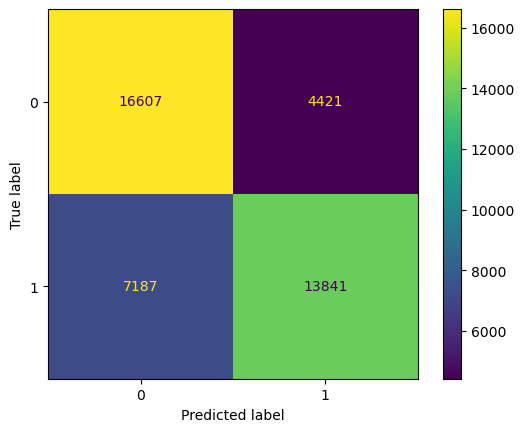

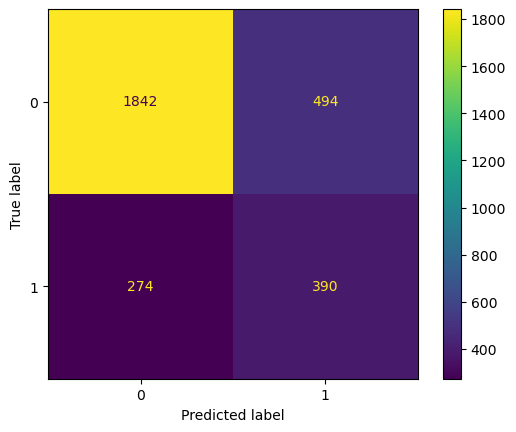

In [114]:
tune_logistic(X_train_new1, Y_train_res,X_test_new1,Y_test)

In [116]:
X_train_new1


array([[ 0.15129909, -0.93219602,  1.79590802, ...,  0.97283414,
        -0.09067997, -0.95707413],
       [-0.01208858, -0.93219602,  0.38260121, ...,  0.97283414,
        -0.09067997, -0.95707413],
       [-0.25717008,  1.07273575,  0.49131712, ...,  0.97283414,
        -0.09067997, -0.95707413],
       ...,
       [-0.67269007, -0.93219602, -0.9219897 , ...,  0.97283414,
        -0.09067997, -0.95707413],
       [-0.42055775,  1.07273575, -0.57090878, ...,  0.97283414,
        -0.09067997, -0.95707413],
       [-0.28638888, -0.93219602,  0.24267302, ...,  0.97283414,
        -0.09067997, -0.95707413]])

Train Data
Accuracy: 0.7809349438843447
F1-score: 0.7655307561143206
Confusion matrix:
test data
Accuracy: 0.7753333333333333
F1-score: 0.5482573726541554
Confusion matrix:


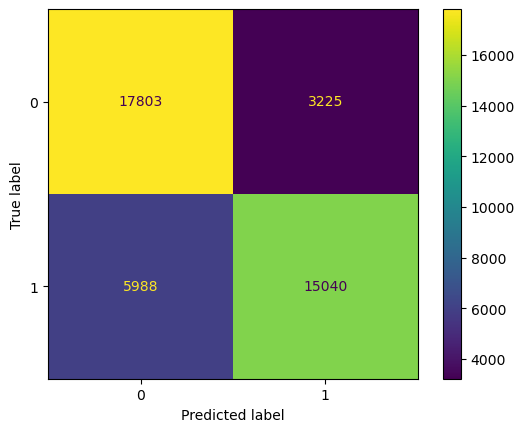

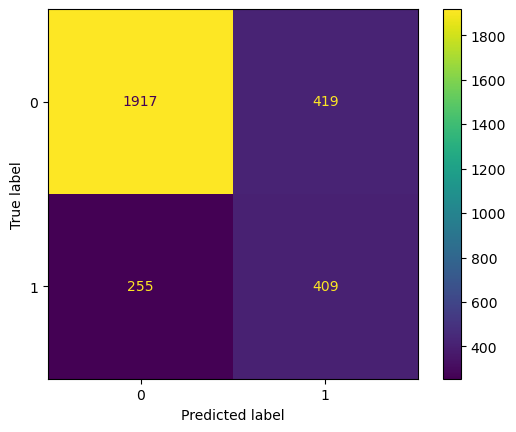

In [119]:
random_f(X_train_new1, Y_train_res,X_test_new1,Y_test,10,'sqrt',1,2,300)

We can clearly see that there is no improvement when using one hot encoding

Train Data
Accuracy: 0.7532813391668252
F1-score: 0.7357106469689251
Confusion matrix:
test data
Accuracy: 0.763
F1-score: 0.5325443786982249
Confusion matrix:


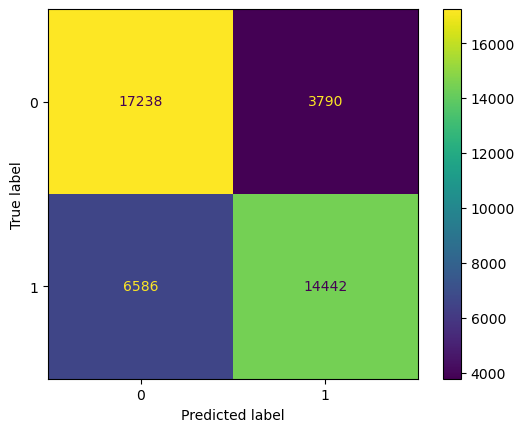

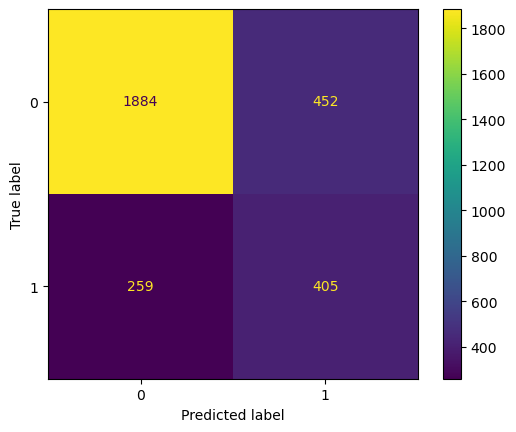

In [120]:
clf = svm_(X_train_new1, Y_train_res,X_test_new1,Y_test)

Train Data
Accuracy: 0.792015408027392
F1-score: 0.793405607123456
Confusion matrix:
test data
Accuracy: 0.7036666666666667
F1-score: 0.4767510300176575
Confusion matrix:


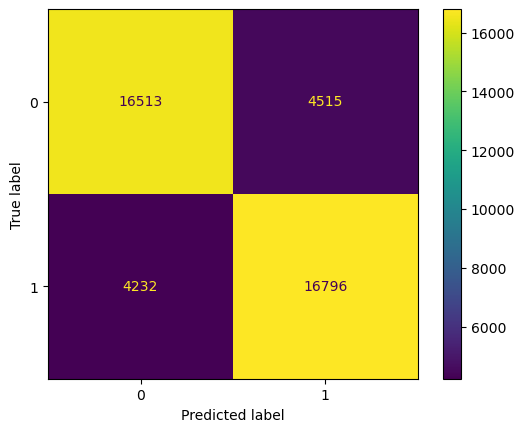

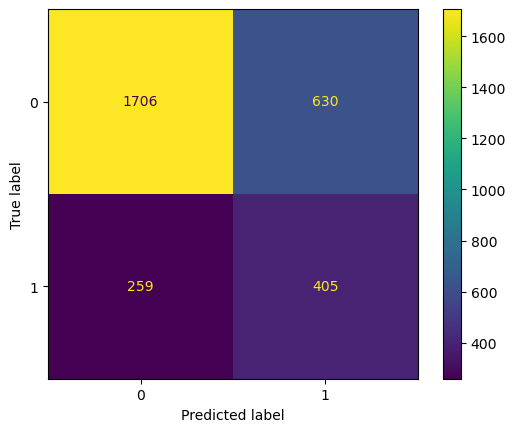

In [145]:
mlp1 = mlp(X_train_new1, Y_train_res,X_test_new1,Y_test)

References

[1]https://www.kaggle.com/code/bansodesandeep/credit-card-default-prediction#One-Hot-Encoding.


[2] https://github.com/SanikaDharwadker/CreditCardDefault.
